# Анализ рынка автомобилей в Казахстане за 2019 год

Задачей данного исследования - определить рыночные сегменты Меркур Авто и разработать маркетинговый план.  
В нашем распоряжении есть датасет с данными по продажам автомобилей в Казахстане за 2019 год. Данные получены из официальной статистики VAG, после перевода из эксель в csv обнаружились множественные проблемы с исходными данными.  
  
Работу мы разделим на 4 этапа:
- предобработка данных;
- исследовательский анализ данных;
- анализ рынка автомобилей Казахстана;
- анализ позиции Меркур Авто.

## Загрузка данных и подготовка к анализу

### Загрузка библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import numpy as np
import warnings

Уберем ограничение по выводу строк, колонок и символов в записи и включаем игнорирование ошибок Jupiter.

In [2]:
# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
 
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
 
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

Прописываем темы визуализации.

In [3]:
sns.set_style('darkgrid')
plt.style.use('ggplot')

### Загрузка данных

Запишем датафреймм auto_kz_2019.csv в датасет data.

In [4]:
data = pd.read_csv('auto_kz_2019.csv', sep=";", decimal=',')

In [5]:
print(data.info())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Год                             39966 non-null  int64  
 1   Месяц                           39966 non-null  object 
 2   Компания                        39966 non-null  object 
 3   Бренд                           39966 non-null  object 
 4   Модель                          39966 non-null  object 
 5   Модификация                     36375 non-null  object 
 6   Год выпуска                     39465 non-null  object 
 7   Страна-производитель            39966 non-null  object 
 8   Вид топлива                     36826 non-null  object 
 9   Объём двиг, л,                  35708 non-null  object 
 10  Коробка передач                 36711 non-null  object 
 11  Тип привода                     35677 non-null  object 
 12  Сегмент                         

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",Коробка передач,Тип привода,Сегмент,Регион,Наименование дилерского центра,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
0,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.0,28115.00,28115.00,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Август,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,наличный,1.0,32246.99,32246.99,г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Апрель,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-Tronic,FWD,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.0,32000.00,32000.00,г.Алматы,Легковые автомобили,D класс,D,Импорт
3,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,безналичный,1.0,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс,D,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1.0,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс,D,Импорт


В нашем распоряжении датафрейм data с 25 столбцами и 39966 строками.
- `Год` – год продажи (2019);
- `Месяц` – месяц продажи;
- `Компания` – название автоцентра;
- `Бренд` – название продаваемой марки автомобиля;
- `Модель` – название модели автомобиля;
- `Модификация` – модификация модели автомобиля;
- `Год выпуска` – год производства автомобиля;
- `Страна-производитель` – страна, где произведен автомобиль;
- `Вид топлива` – бензин, дизель, электричество, гибрид;
- `Объём двиг л` – объем двигателя автомобиля в литрах;
- `Коробка передач` – тип коробки переключения передач ;
- `Тип привода` – тип привода автомобиля;
- `Сегмент` – сегмент, к которому относится авто;
- `Регион` – регион продажи;
- `Наименование дилерского центра` – совпадает с компанией;
- `Тип клиента` – юридическое или физическое лицо;
- `Форма расчета` – наличный и безналичный расчет ;
- `Количество` – количество автомобилей в заказе;
- `Цена USD` – цена автомобиля;
- `Продажа USD` – цена заказа (цена авто умноженная на количество и за вычетом скидок если есть);
- `Область` – область продажи;
- `Сегментация 2013` – сегмент автомобиля актуальный;
- `Класс 2013` – класс автомобиля актуальный;
- `Сегментация Eng` – английская сегментация;
- `Локализация производства` – совпадает со страной производителем.

Сохраним данные о размере датафрейма в перем енную start_shape.

In [6]:
start_shape = data.shape

### Предобработка данных

#### Переименование столбцов

Для удобства работы переименуем столбцы на английский язык и избавимся от вехнего регистра.

In [7]:
columns_start = data.columns.tolist()

columns_end = ['year', 'month', 'company', 'brand', 'model', 'modification', 'release_year',
               'manufacturing_country', 'fuel_type', 'engine_volume', 'transmission_type',
               'drive_type', 'segment', 'region', 'dealer', 'client_type', 'payment_type',
         'quantity', 'price_usd', 'sell_price_usd', 'state', 'segment_2013', 'class_2013',
               'segment_eng', 'product_localization']

change_col_dict = {k:v for k, v in zip(columns_start, columns_end)}

data = data.rename(columns=change_col_dict)

Проверим, что столбцы переименовались.

In [8]:
print(data.columns)
display(data.head())

Index(['year', 'month', 'company', 'brand', 'model', 'modification',
       'release_year', 'manufacturing_country', 'fuel_type', 'engine_volume',
       'transmission_type', 'drive_type', 'segment', 'region', 'dealer',
       'client_type', 'payment_type', 'quantity', 'price_usd',
       'sell_price_usd', 'state', 'segment_2013', 'class_2013', 'segment_eng',
       'product_localization'],
      dtype='object')


,year,month,company,brand,model,modification,release_year,manufacturing_country,fuel_type,engine_volume,transmission_type,drive_type,segment,region,dealer,client_type,payment_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013,segment_eng,product_localization
0,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.0,28115.00,28115.00,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Август,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,наличный,1.0,32246.99,32246.99,г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Апрель,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-Tronic,FWD,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.0,32000.00,32000.00,г.Алматы,Легковые автомобили,D класс,D,Импорт
3,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,безналичный,1.0,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс,D,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1.0,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс,D,Импорт


#### Удаляем ненужные для анализа столбцы

Для дальнейшего анализа нам не потребуются столбцы с названием дилера (дублируется столбцом company), тип оплаты, сегмент, английский сегмент и локализация.

In [9]:
data = data.drop(columns=['dealer', 'payment_type', 'segment', 'segment_eng', 'product_localization'])


Проверим, что столбцы удалены.

In [10]:
data.columns

Index(['year', 'month', 'company', 'brand', 'model', 'modification',
       'release_year', 'manufacturing_country', 'fuel_type', 'engine_volume',
       'transmission_type', 'drive_type', 'region', 'client_type', 'quantity',
       'price_usd', 'sell_price_usd', 'state', 'segment_2013', 'class_2013'],
      dtype='object')

#### Проверка на пропуски

Проверим наш датафрейм на пропуски.

In [11]:
print(f'Пропусков в датафреме {data.isna().sum()}')

Пропусков в датафреме year                        0
month                       0
company                     0
brand                       0
model                       0
modification             3591
release_year              501
manufacturing_country       0
fuel_type                3140
engine_volume            4258
transmission_type        3255
drive_type               4289
region                      0
client_type              7047
quantity                    6
price_usd                   0
sell_price_usd              0
state                       0
segment_2013                0
class_2013                  0
dtype: int64


И посмотрим на количество пропусков в процентном соотношении.

In [12]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
year,0.000000
month,0.000000
company,0.000000
brand,0.000000
model,0.000000
modification,9.000000
release_year,1.300000
manufacturing_country,0.000000
fuel_type,7.900000
engine_volume,10.700000


Посмотрим, как насколько уменьшится датафрейм, если мы удалим строки с пропусками.

In [13]:
clear_data = len(data.dropna())

print(f'Потери данных: {(len(data) - clear_data) / len(data):.2%}')

Потери данных: 26.52%


26,45%, это очень большой объем данных, мы не можем его удалить.

Заполним пропуски в столбцах для удобства фильтрации дальше:
- `release_year` значением -1,
- `fuel_type` значением "Нет данных",
- `engine_volume` значением 999,
- `transmission_type` значением "Нет данных"
- `drive_type` значением "Нет данных",
- `client_type` значением "Нет данных",

In [14]:
#заполним пропуски в release_year
data['release_year'] = data['release_year'].fillna(-1)

#заполним пропуски в engine_volume
data['engine_volume'] = data['engine_volume'].fillna(999)

#заполним пропуски в fuel_type, transmission_type, drive_type, client_type
data[['fuel_type', 
      'transmission_type', 
      'drive_type', 
      'client_type']] = data[['fuel_type', 
                              'transmission_type', 
                              'drive_type', 
                              'client_type']].fillna('nodata')

#Проверим, заполнились ли пропуски
print(f'Пропусков осталось в датафреме {data.isna().sum()}')

Пропусков осталось в датафреме year                        0
month                       0
company                     0
brand                       0
model                       0
modification             3591
release_year                0
manufacturing_country       0
fuel_type                   0
engine_volume               0
transmission_type           0
drive_type                  0
region                      0
client_type                 0
quantity                    6
price_usd                   0
sell_price_usd              0
state                       0
segment_2013                0
class_2013                  0
dtype: int64


Пропуски заполнены

#### Проверка на явные дубли

Проверим датафрейм на явные дубли.

In [15]:
print(f'Явных дублей в датафреме data {data.duplicated().sum()}')

Явных дублей в датафреме data 20848


В датафрейме 22321 явных дубля, это может говорить нам о том, что каждую сделку автодилер вносил новой строкой. Удалять эти дубли мы не будем.

#### Проверка на неявные дубли

Проверим, есть ли в нашем датафрейме неявные дубли. Для начала посмотрим на количество уникальных значений в столбцах.

In [16]:
for i in data.columns:
    print(i, data[i].nunique())

year 1
month 9
company 40
brand 46
model 273
modification 1383
release_year 10
manufacturing_country 19
fuel_type 11
engine_volume 115
transmission_type 84
drive_type 27
region 26
client_type 10
quantity 56
price_usd 3510
sell_price_usd 4183
state 18
segment_2013 5
class_2013 21


В столбце `year` одно уникальное значение - 2019 год, в `price_usd` и `sell_price_usd` тысячи уникальных значений - у разных автомобилей в разных дилерских центрах - это логично. Каждый следующий столбец будем рассматривать отдельно.

#### Проверка на неявные дубли в столбце `month`

In [17]:
data['month'].unique()

array(['Май', 'Август', 'Апрель', 'Июль', 'Февраль', 'Июнь', 'Сентябрь',
       'Январь', 'Март'], dtype=object)

В столбце `month` нет неявных дублей.

#### Проверка на неявные дубли в столбце `company`

In [18]:
print(data['company'].unique())
print('Всего уникальных названий компаний - ', data['company'].nunique())

['Mercur Auto' 'Автоцентр-Бавария' 'БИПЭК АВТО' 'Вираж'
 'Eurasia Motor Premium' 'Daewoo Bus Kazakhstan' 'Caspian Motors'
 'Каспиан Моторс' 'СемАЗ' 'Astana Motors' 'Astana Motors '
 'Hyundai Com Trans Kazakhstan ' 'Nissan Manufacturing RUS' 'СВС-ТРАНС'
 'Allur Auto' 'Almaty Motors Premium' 'TERRA MOTORS' 'ТК КАМАЗ'
 'Toyota Motor Kazakhstan' 'Лифан Моторс Рус' 'MAN Truck & Bus Kazakhstan'
 'Автомир ГК' 'Autokapital' 'Автокапитал' 'ММС Рус' 'MMC RUS'
 'Mercur Autos' 'УзАвто-Казахстан' 'Равон Моторс Казахстан'
 'Ravon Motors Kazakstan' 'Renault Россия' 'Scania Central Asia'
 'Subaru Kazakhstan' 'Volkswagen Group Rus' 'Автодом Motors KST'
 'Автомир-Центр' 'ТОО "Eurasia Motor Zhaik"' 'Scandinavian Motors'
 'Хино Моторс Казахстан' 'Hino Motors ']
Всего уникальных названий компаний -  40


Мы видим, что у нас есть Каспиан Моторс и Caspian Motors, Mercur Autos и Mercur Auto, Astana Motors и "Astana Motors ", ММС Рус и MMC RUS, Hino Motors и Хино Моторс Казахстан. Из-за того, что сотрудники вручную вносили все данные появились такие дубли. Приведем их к единому виду.

In [19]:
data = data.replace({'company':{'Mercur Autos':'Mercur Auto', 
                                'Astana Motors ':'Astana Motors', 
                               'Caspian Motors':'Каспиан Моторс',
                               'MMC RUS':'ММС Рус',
                               'Hino Motors ':'Хино Моторс Казахстан'}})
print(data['company'].unique())
print('Всего уникальных названий компаний - ', data['company'].nunique())

['Mercur Auto' 'Автоцентр-Бавария' 'БИПЭК АВТО' 'Вираж'
 'Eurasia Motor Premium' 'Daewoo Bus Kazakhstan' 'Каспиан Моторс' 'СемАЗ'
 'Astana Motors' 'Hyundai Com Trans Kazakhstan '
 'Nissan Manufacturing RUS' 'СВС-ТРАНС' 'Allur Auto'
 'Almaty Motors Premium' 'TERRA MOTORS' 'ТК КАМАЗ'
 'Toyota Motor Kazakhstan' 'Лифан Моторс Рус' 'MAN Truck & Bus Kazakhstan'
 'Автомир ГК' 'Autokapital' 'Автокапитал' 'ММС Рус' 'УзАвто-Казахстан'
 'Равон Моторс Казахстан' 'Ravon Motors Kazakstan' 'Renault Россия'
 'Scania Central Asia' 'Subaru Kazakhstan' 'Volkswagen Group Rus'
 'Автодом Motors KST' 'Автомир-Центр' 'ТОО "Eurasia Motor Zhaik"'
 'Scandinavian Motors' 'Хино Моторс Казахстан']
Всего уникальных названий компаний -  35


Замена прошла успешно.

#### Проверка на неявные дубли в столбце `brand`

In [20]:
print(data['brand'].unique())

['Audi' 'BMW' 'Chevrolet' 'Daewoo' 'Ford' 'Foton' 'GAZ' 'Hyundai'
 'Hyundai Truck & Bus' 'Infiniti' 'Isuzu' 'Iveco' 'Jac' 'Jaguar' 'KAMAZ'
 'Kia' 'Lada' 'Land Rover' 'Lexus' 'Lifan' 'MAN' 'Mazda' 'Mercedes-Benz'
 'Mercedes-Benz Trucks' 'Mini' 'Mitsubishi' 'Nissan' 'Peugeot' 'Porsche'
 'Ravon' 'Renault' 'Scania' 'Skoda' 'Subaru' 'Toyota' 'UAZ' 'Volkswagen'
 'Volvo' 'Урал' 'Cadillac' 'Shacman' 'Hino' 'Dong Feng' 'ANKAI' 'Nefaz'
 'Yutong']


В столбце `brand` нет неявных дублей.

#### Проверка на неявные дубли в столбце `release_year`

In [21]:
print(data['release_year'].unique())

['2018' '2017' '2019' -1 '2016' '2014' '2013' '2011' '2\xa0018' '2\xa0019']


Мы видим, что у нас в столбцах есть 2\xa0018 и 2\xa0019, это 2018 и 2019 год со скрытым пробелом, возможно, появился из-за перевода данных из Excell, заменим их.

In [22]:
data = data.replace({'release_year':{'2\xa0018':'2018', 
                                '2\xa0019':'2019'}})
print(data['release_year'].unique())

['2018' '2017' '2019' -1 '2016' '2014' '2013' '2011']


Пропущенные года, которые стали у нас значением "-1" мы не сможем восстановить, но удлалять их мы не будет, чтобы оставить запись о сделке.

#### Проверка на неявные дубли в столбце `manufacturing_country`

In [23]:
print(data['manufacturing_country'].unique())

['Германия' 'США' 'Австрия' 'Республика Казахстан' 'Российская Федерация'
 'Корея' 'Япония' 'Таиланд' 'Китай' 'UK' 'Узбекистан' 'Венгрия' 'Турция'
 'Испания' 'Нидерланды' 'Польша' 'Швеция' 'Белоруссия' 'Бельгия']


В столбце `manufacturing_country` нет неявных дублей.

#### Проверка на неявные дубли в столбце `fuel_type`

In [24]:
print(data['fuel_type'].unique())

['Бензин' 'Дизель' 'nodata' 'дизель ' 'бензин ' 'гибрид' '2' '1,6' '0'
 'Электро' 'Электричество']


Мы видим, что у нас есть Бензин и 'бензин ', Дизель и 'дизель ', Электро и Электричество, а также цифры. Заменим пока что одинаковые значения написанные по-разному.

In [25]:
data = data.replace({'fuel_type':{'бензин ':'Бензин', 
                                'дизель ':'Дизель', 
                               'Электро':'Электричество'}})
print(data['fuel_type'].unique())

['Бензин' 'Дизель' 'nodata' 'гибрид' '2' '1,6' '0' 'Электричество']


Взглянем на строки, где в типе топлива цифры, возможно, при занесении данных перепутали столбцы и вписали в них объем двигателя.

In [26]:
display(data.query('fuel_type == "2" | fuel_type == "1,6"').head())
display(data.query('fuel_type == "0"').head())

,year,month,company,brand,model,modification,release_year,manufacturing_country,fuel_type,engine_volume,transmission_type,drive_type,region,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
23723,2019,Январь,Renault Россия,Renault,Duster,E2GB4AG,2019,Российская Федерация,2,MT,4WD,4WD,Уральск,nodata,1.0,12249.61125,12249.61125,Западно-Казахстанская область,Внедорожники,Субкомпактные SUV
23724,2019,Январь,Renault Россия,Renault,Duster,E2GB4AGA,2018,Российская Федерация,2,AT,4WD,4WD,Нур-Султан,nodata,1.0,12249.61125,12249.61125,г.Нур-Султан,Внедорожники,Субкомпактные SUV
23725,2019,Январь,Renault Россия,Renault,Duster,E2GB4AGA,2018,Российская Федерация,2,AT,4WD,4WD,Нур-Султан,nodata,1.0,12249.61125,12249.61125,г.Нур-Султан,Внедорожники,Субкомпактные SUV
23726,2019,Январь,Renault Россия,Renault,Duster,E2GB4AGA,2018,Российская Федерация,2,AT,4WD,4WD,Кызылорда,nodata,1.0,12249.61125,12249.61125,Кызылординская область,Внедорожники,Субкомпактные SUV
23727,2019,Январь,Renault Россия,Renault,Duster,E2GB4AG,2018,Российская Федерация,2,MT,4WD,4WD,Караганда,nodata,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV


,year,month,company,brand,model,modification,release_year,manufacturing_country,fuel_type,engine_volume,transmission_type,drive_type,region,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
37121,2019,Январь,БИПЭК АВТО,UAZ,3741,3741,2018,Республика Казахстан,0,"2,693",5 МТ,Полный,Талдыкорган,nodata,1.0,14200.0,14200.0,Алматинская область,Коммерческие автомобили,Малотоннажные грузовики
37122,2019,Январь,БИПЭК АВТО,UAZ,3741,3741,2018,Республика Казахстан,0,"2,693",5 МТ,Полный,Актобе,nodata,3.0,14200.0,42600.0,Актюбинская область,Коммерческие автомобили,Малотоннажные грузовики
37123,2019,Январь,БИПЭК АВТО,UAZ,3741,3741,2018,Республика Казахстан,0,"2,693",5 МТ,Полный,Актау,nodata,2.0,14200.0,28400.0,Мангистауская область,Коммерческие автомобили,Малотоннажные грузовики


Мы видим, что в компании Renault Россия сбились колонки: в тип трансмиссии записан тип приводы, в объем двигателя - тип трансмиссии,а в тип топлива - объем двигателя, перезапишем данные. А в записали 0 по ошибке, заменим его на Бензин, согласно даннмы с [сайта диллера](https://uaz.kz/cars/classic/passenger/osteklennyij-furgon)

In [27]:
data = data.replace({'fuel_type':{'0':'Бензин'}})

In [28]:
#Запишем значения из столбца engine_volume в столбец transmission_type
data.loc[(data['fuel_type'] == "2") 
         |(data['fuel_type'] == "1,6"), 
         'transmission_type'] = data.loc[(data['fuel_type'] == "2") 
                                         |(data['fuel_type'] == "1,6"), 'engine_volume'] 
#Запишем значения из столбца fuel_type в столбец engine_volume
data.loc[(data['fuel_type'] == "2") 
         |(data['fuel_type'] == "1,6"), 
         'engine_volume'] = data.loc[(data['fuel_type'] == "2") 
                                     |(data['fuel_type'] == "1,6"), 'fuel_type'] 
#проверим, что замена прошла
display(data.query('fuel_type == "2" | fuel_type == "1,6"').head())

,year,month,company,brand,model,modification,release_year,manufacturing_country,fuel_type,engine_volume,transmission_type,drive_type,region,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
23723,2019,Январь,Renault Россия,Renault,Duster,E2GB4AG,2019,Российская Федерация,2,2,MT,4WD,Уральск,nodata,1.0,12249.61125,12249.61125,Западно-Казахстанская область,Внедорожники,Субкомпактные SUV
23724,2019,Январь,Renault Россия,Renault,Duster,E2GB4AGA,2018,Российская Федерация,2,2,AT,4WD,Нур-Султан,nodata,1.0,12249.61125,12249.61125,г.Нур-Султан,Внедорожники,Субкомпактные SUV
23725,2019,Январь,Renault Россия,Renault,Duster,E2GB4AGA,2018,Российская Федерация,2,2,AT,4WD,Нур-Султан,nodata,1.0,12249.61125,12249.61125,г.Нур-Султан,Внедорожники,Субкомпактные SUV
23726,2019,Январь,Renault Россия,Renault,Duster,E2GB4AGA,2018,Российская Федерация,2,2,AT,4WD,Кызылорда,nodata,1.0,12249.61125,12249.61125,Кызылординская область,Внедорожники,Субкомпактные SUV
23727,2019,Январь,Renault Россия,Renault,Duster,E2GB4AG,2018,Российская Федерация,2,2,MT,4WD,Караганда,nodata,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV


Согласно Википедии Renault [Duster](https://ru.wikipedia.org/wiki/Renault_Duster) , как и [Sandero](https://ru.wikipedia.org/wiki/Renault_Sandero),выпускаются со следующими типами двигателей
- 1,5 L dCi дизельный 90 л.с. (Россия, Румыния)
- 1,6 L l4 бензиновый 102 л.с. (Россия)
- 1,6 H4M бензиновый 114 л.с. (Россия)
- 2,0 L l4 бензиновый 135 л.с. (Россия)
- 1,6 L l4 бензиновый 105 л.с. (Румыния)
- 1,5 L dCi дизельный 110 л.с. (Румыния)
- 1,6 L l4 бензиновый 110 л.с. (Бразилия)
- 2,0 L l4 бензиновый 138 л.с. (Бразилия)  
  
Т.е. с двигателями 1,6 и 2 литра бывают только бензиновые. Заменим значения в датафрейме.

In [29]:
data = data.replace({'fuel_type':{'1,6':'Бензин', 
                                '2':'Бензин'}})
print(data['fuel_type'].unique())

['Бензин' 'Дизель' 'nodata' 'гибрид' 'Электричество']


Замены прошли успешно.

Теперь взглянем сколько записей какого типа топлива у нас в датафрейме

In [30]:
display(data['fuel_type'].value_counts())

Бензин           35000
nodata            3140
Дизель            1803
Электричество       13
гибрид              10
Name: fuel_type, dtype: int64

Посмотрим на модели автомобилей, модификацию и объем двигателя топ-10 моделей по пропускам, т.е. с "nodata" в типе топлива.

In [31]:
display(data[data['fuel_type'] == 'nodata']
        .groupby(['brand', 'model', 'modification', 'engine_volume'])
        .agg({'quantity':'count'})
        .sort_values(by='quantity', ascending=False)
        .head(10))


quantity
brand   model   modification         engine_volume          
Jac     S3      Luxury 1.6 MT        1,6                 152
Renault Sandero SXPA16PA5RB          999                 135
        Duster  Z2GB4AG              999                  89
                Z2GB4AGA             999                  88
        Sandero SUTA16PA5RB          999                  70
Jac     S3      Intelligent 1.6 CVT  1,6                  63
        S5      Intelligent 2.0T MT6 999                  63
Renault Duster  Z1FB4AG              999                  62
Jac     S3      Luxury               999                  59
Renault Kaptur  ZB34AAA5C            999                  54

Мы видим закономерность, что если пропущен объем двигателя, то пропущен и тип двигателя.

С [официального сайта jac](https://jacuae.com/s3.html) мы видим, что модели S3 идут с двигателем 1.6L VVT, который, согласно [Википедии](https://en.wikipedia.org/wiki/Proton_CamPro_engine) работает на бензине.  

Renault мы уже знаем, что двигатели 1,6 и 2 литра - бензин, а 1,5 - дизель. Из модельного ряла однозначно нельзя сказать, какая именно модель пердставлена у нас, можно предположить, что цифры 16 и 2 - это двигатели 1,6 и 2, но найти достоверное подтверждение не удалось.   
Jac S5, согласно [Википедии](https://en.wikipedia.org/wiki/JAC_Refine_S5), имеет двигатели на бензине - 1,6 литра или 2.0 турбо, что мы видим в модельном обозначении.   
Renault Kaptur, согласно [Википедии](https://en.wikipedia.org/wiki/Renault_Captur), имеет двигатели на бенщине (0,9, 1,2, 1,3 л) и на дизеле (1,5 л), какой двигатель представлен у нас мы не может определить точно.  


Таким образом, у моделей S3 и S5 мы можем проставить вид топлива Бензин.

In [32]:
data.query('brand == "Jac" & model == "S5"').groupby('fuel_type').count()

,year,month,company,brand,model,modification,release_year,manufacturing_country,engine_volume,transmission_type,drive_type,region,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
fuel_type,,,,,,,,,,,,,,,,,,,
nodata,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158
Бензин,285,285,285,285,285,285,285,285,285,285,285,285,285,285,285,285,285,285,285
Дизель,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [33]:
#в тип топлива моделей Jac S3 бензин
data.loc[(data['brand'] == 'Jac') & (data['model'] == 'S3'), 'fuel_type'] =  'Бензин'

#в тип топлива моделей Jac S5 бензин
data.loc[(data['brand'] == 'Jac') & (data['model'] == 'S5'), 'fuel_type'] = 'Бензин'

Проверим замену.

In [34]:
print('Тип топлива у Jac S3 - ', data.query('brand == "Jac" & model == "S3"')['fuel_type'].unique())
print('Тип топлива у Jac S5 - ', data.query('brand == "Jac" & model == "S5"')['fuel_type'].unique())

Тип топлива у Jac S3 -  ['Бензин']
Тип топлива у Jac S5 -  ['Бензин']


Еще раз вгглянем на основные модели с пропусками в типе топлива.

In [35]:
display(data[data['fuel_type'] == 'nodata']
        .groupby(['brand', 'model', 'engine_volume'])
        .agg({'quantity':'count'})
        .sort_values(by='quantity', ascending=False)
        .head(10))

quantity
brand   model       engine_volume          
Renault Duster      999                 650
        Sandero     999                 435
        Logan       999                 320
        Kaptur      999                 230
GAZ     3302        999                 127
        Next        999                  71
Renault Arkana      999                  55
ANKAI   HFF6850G    999                  54
Mazda   CX-5        999                  51
Shacman SX3258DR384 999                  43

Renault бывают, как с бензиновыми двигателями, так и с дизельными, однозначно заполнить мы не можем.  
[Renault Duster](https://en.wikipedia.org/wiki/Dacia_Duster) - дигатели 1,2, 1,3, 1,5, 1,6, 2 лл. бензин, 1,5 дизель, однозначно заполнить мы **не можем**.  
[Renault Sandero](https://en.wikipedia.org/wiki/Dacia_Sandero) - 0,9, 1, 1,2, 1,6, 2 лл.- бензин, 1,2 л. - газ, 1,5 л. - дизель однозначно заполнить мы **не можем**.  
[Renault Logan](https://en.wikipedia.org/wiki/Dacia_Logan) - 1,2, 1,4, 1,6 лл. - бензин, 1,5 л. - дизель, однозначно заполнить мы **не можем**.  
[Renault Kaptur](https://en.wikipedia.org/wiki/Renault_Captur) - 1,3, 1,5, 1,6, 2 лл. - бензин, 1,5 л. - дизель, однозначно заполнить мы **не можем**.  
[GAZ 3302](https://en.wikipedia.org/wiki/GAZelle) - 2,286, 2,429, 2,445, 2,46, 2,89 лл. -  бензин, 2,134, 2,781 лл. - дизель, 2,89 л. - газ, однозначно заполнить мы **не можем**.  
[GAZ Next](https://en.wikipedia.org/wiki/GAZelle_NEXT) - 2,7 и 2,8 л. бензин/газ, 2,8 - дизель, однозначно заполнить мы **не можем**.  
[Renault Arkana](https://en.wikipedia.org/wiki/Renault_Arkana) - 1,5 или 1,6 л. - бензин или гибрид на бензине, соответственно, **можем** заполнить однозначно на бензин.  
[ANKAI HFF6850G](https://russian.alibaba.com/product-detail/china-city-bus-factory-price-good-60698105901.html) - 4,98 л дизель, **можем** заполнить однозначно на дизель.  
[Mazda CX-5](https://en.wikipedia.org/wiki/Mazda_CX-5) - 2,0 и 2,5 лл. - бензин, 2,2 л. - дизель, однозначно заполнить мы **не можем**.  
[Shacman SX3258DR384](https://www.starkmetal.ru/samosvali/shacman/shacman-6x4-sx3258dr384-f3000) - 9,726 л. дизель, **можем** заполнить однозначно на дизель.

In [36]:
#Создадим списки моделей и типы их топлива
brands = ['Renault', 'ANKAI', 'Shacman']
models = ['Arkana', 'HFF6850G', 'SX3258DR384']
fuels = ['Бензин', 'Дизель', 'Дизель']

#сделаем цикл для проставления типа топлива для каждой модели авто
for brand, model, fuel in zip(brands, models, fuels):
    data.loc[(data['brand'] == brand) & (data['model'] == model), 'fuel_type'] =  fuel
    print(f'Тип топлива у {brand} {model} - ')
    print(data.loc[(data['brand'] == brand) & (data['model'] == model), 'fuel_type'].unique())

Тип топлива у Renault Arkana - 
['Бензин']
Тип топлива у ANKAI HFF6850G - 
['Дизель']
Тип топлива у Shacman SX3258DR384 - 
['Дизель']


In [37]:
data['fuel_type'].value_counts()

Бензин           35596
nodata            2432
Дизель            1915
Электричество       13
гибрид              10
Name: fuel_type, dtype: int64

Мы заполнили 708 пропусков.

#### Проверка на неявные дубли в столбце `engine_volume`

In [38]:
print(data['engine_volume'].unique())

['1,4' '2' '3' '4,4' '6,6' '1,5' '1,596' '2,4' '1,7' '26,7' '25,7' '24,7'
 '23,7' '22,7' '21,7' '20,7' '19,7' '18,7' '17,7' '16,7' '15,7' '14,7'
 '13,7' '12,7' '11,7' '10,7' '9,7' '8,7' '7,7' '6,7' '5,7' '4,7' '3,7'
 '2,7' '6,2' '1,4 Turbo' '2,5' '1,6' 999 '2,8' '4,3' '4,3,' '1,6 MPI'
 '2,0 MPI' '2,4 GDI' '2,4 MPI' '2,5 CRDI VGT' '2,5 CRDI WGT' '3,9' '7,5'
 '12,3' '1,6 T-GDI' '2,0 CRDI' '2.0' '3,5' '5,6' '5,2' '3,0 L' '1.6' '1.5'
 '5' '1,598' '1,248' '1,998' '2,359' '1,999' '3,342' '1,591' '3,47' '1,69'
 '1,774' '2.5' '2.7 ' '3.5' '2.7' '4.6' '4,6' '5.7' '1,8' '10,5' '4' '5,5'
 '12' '12,8' '11' '2,2' '1,2' '1,485' '13' '1,33' '#Н/Д' '4.0' '2.4G'
 '2,4G' '2.8' '2,693' '2,0' '3,8' '3.8' '1,2T' '3,6' '7,6' '4,9' '2.0h'
 '2,9' '400 Л.С.' '4,98 L,' '4,98' '88 KWH' '8,4 L,' '6,7L' '6,5']


Взглянем подробнее на строки со значениями 400 Л.С., 88 KWH и #Н/Д, т.к. в остальных случаях у нас, очевидно, объем двигателя или объем двигателя с его типом.

Посмотрим на строки со значением #Н/Д в объеме двигателя.

In [39]:
data.query('engine_volume == "#Н/Д"')

,year,month,company,brand,model,modification,release_year,manufacturing_country,fuel_type,engine_volume,transmission_type,drive_type,region,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
31148,2019,Февраль,Toyota Motor Kazakhstan,Toyota,Corolla,7,2019,Турция,Бензин,#Н/Д,#Н/Д,#Н/Д,Нур-Султан,Физ. Лицо,1.0,42316.46043,42316.46043,г.Нур-Султан,Легковые автомобили,C класс
31149,2019,Февраль,Toyota Motor Kazakhstan,Toyota,Corolla,7,2019,Турция,Бензин,#Н/Д,#Н/Д,#Н/Д,Нур-Султан,Физ. Лицо,1.0,42316.46043,42316.46043,г.Нур-Султан,Легковые автомобили,C класс
32670,2019,Апрель,Toyota Motor Kazakhstan,Toyota,HILUX DC,JT,2019,Таиланд,Бензин,#Н/Д,#Н/Д,#Н/Д,Алматы,Юр. Лицо,1.0,30870.28194,30870.28194,г.Алматы,Пикапы,Pick-ups
33070,2019,Июль,Toyota Motor Kazakhstan,Toyota,HILUX DC,NX,2019,Таиланд,Бензин,#Н/Д,#Н/Д,#Н/Д,Атырау,Физ. Лицо,1.0,27012.45730,27012.45730,Атырауская область,Пикапы,Pick-ups


[Toyota Corolla](https://en.wikipedia.org/wiki/Toyota_Corolla) - двигатели от 1,4 до 2 литров, однозначно заменитть не можем.  
[Toyota HILUX DC](https://en.wikipedia.org/wiki/Toyota_Hilux) - двигатели от 2 до 4 литров, однозначно заменитть не можем.
Заменим на значение 999.

In [40]:
data.loc[(data['engine_volume'] == '#Н/Д'), 'engine_volume'] =  999

Посмотрим на строки со значением 400 Л.С. в объеме двигателя.

In [41]:
data.query('engine_volume == "400 Л.С."')

,year,month,company,brand,model,modification,release_year,manufacturing_country,fuel_type,engine_volume,transmission_type,drive_type,region,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
39544,2019,Февраль,Almaty Motors Premium,Jaguar,I-Pace,ЭЛЕКТРОКАР,2019,UK,Электричество,400 Л.С.,РЕДУКТОР,4WD,Алматы,Физ. Лицо,1.0,117236.9729,117236.9729,г.Алматы,Внедорожники,Компактные SUV
39545,2019,Апрель,Almaty Motors Premium,Jaguar,I-Pace,ЭЛЕКТРОКАР,2019,UK,Электричество,400 Л.С.,РЕДУКТОР,4WD,Алматы,Физ. Лицо,1.0,105388.7924,105388.7924,г.Алматы,Внедорожники,Компактные SUV
39546,2019,Июнь,Almaty Motors Premium,Jaguar,I-Pace,ЭЛЕКТРОКАР,2019,UK,Электричество,400 Л.С.,РЕДУКТОР,4WD,Алматы,Юр. Лицо,1.0,120413.2793,120413.2793,г.Алматы,Внедорожники,Компактные SUV


Это электромобиль, заменим объем двигателя на 0.

In [42]:
data.loc[(data['engine_volume'] == '400 Л.С.'), 'engine_volume'] =  999

Посмотрим на строки со значением 88 KWH в объеме двигателя.

In [43]:
data.query('engine_volume == "88 KWH"')

,year,month,company,brand,model,modification,release_year,manufacturing_country,fuel_type,engine_volume,transmission_type,drive_type,region,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
39818,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,Республика Казахстан,Электричество,88 KWH,nodata,2WD,Костанай,Юр. Лицо,1.0,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы
39819,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,Республика Казахстан,Электричество,88 KWH,nodata,2WD,Костанай,Юр. Лицо,1.0,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы
39820,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,Республика Казахстан,Электричество,88 KWH,nodata,2WD,Костанай,Юр. Лицо,1.0,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы
39821,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,Республика Казахстан,Электричество,88 KWH,nodata,2WD,Костанай,Юр. Лицо,1.0,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы
39822,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,Республика Казахстан,Электричество,88 KWH,nodata,2WD,Костанай,Юр. Лицо,1.0,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы
39823,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,Республика Казахстан,Электричество,88 KWH,nodata,2WD,Костанай,Юр. Лицо,1.0,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы
39824,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,Республика Казахстан,Электричество,88 KWH,nodata,2WD,Костанай,Юр. Лицо,1.0,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы
39825,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,Республика Казахстан,Электричество,88 KWH,nodata,2WD,Костанай,Юр. Лицо,1.0,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы
39826,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,Республика Казахстан,Электричество,88 KWH,nodata,2WD,Костанай,Юр. Лицо,1.0,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы
39827,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,Республика Казахстан,Электричество,88 KWH,nodata,2WD,Костанай,Юр. Лицо,1.0,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы


Это электроавтобус, заменим значения на 0.

In [44]:
data.loc[(data['engine_volume'] == '88 KWH'), 'engine_volume'] =  999

Оставшиеся значения обработаем отдельно

Подготовим функцию, которая оставит только необходимые символы в ячейке

In [45]:
def engine_cleaner(cell):
    'функция для удаления лишних символов из столбца объем двигателя'
    good_symbols = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '.', ','] # список символов, которые мы оставляем
    new_cell = '' # новая пустая строка куда мы будем добавлять "хорошие" символы
    for element in cell:
        if element in good_symbols:
            new_cell += element
    if new_cell.endswith('.'): # отдельно обработаем момент где в конце остается точка
        new_cell = new_cell[:-1]
    return new_cell

Приведем все значения в столбце к типу строка.

In [46]:
data['engine_volume'] = data['engine_volume'].astype('str')

Заменим запятые в ячейках на точки.

In [47]:
data['engine_volume'] = data['engine_volume'].str.replace(',', '.')

Применим функцию по очистке датасета.

In [48]:
data['engine_volume'] = data['engine_volume'].apply(engine_cleaner)

Приведем все значения в столбце engine_volume к типу float

In [49]:
data['engine_volume'] = data['engine_volume'].astype(float)

Проверим замену.

In [50]:
print(data['engine_volume'].unique())

[  1.4     2.      3.      4.4     6.6     1.5     1.596   2.4     1.7
  26.7    25.7    24.7    23.7    22.7    21.7    20.7    19.7    18.7
  17.7    16.7    15.7    14.7    13.7    12.7    11.7    10.7     9.7
   8.7     7.7     6.7     5.7     4.7     3.7     2.7     6.2     2.5
   1.6   999.      2.8     4.3     3.9     7.5    12.3     3.5     5.6
   5.2     5.      1.598   1.248   1.998   2.359   1.999   3.342   1.591
   3.47    1.69    1.774   4.6     1.8    10.5     4.      5.5    12.
  12.8    11.      2.2     1.2     1.485  13.      1.33    2.693   3.8
   3.6     7.6     4.9     2.9     4.98    8.4     6.5  ]


Посмотрим на топ 10 моделей с пропусками в объеме двигателя.

In [51]:
print('Всего строк с пропусками', len(data[data['engine_volume'] == 999]))
display(data[data['engine_volume'] == 999]
        .groupby('brand')['model']
        .value_counts()
        .sort_values(ascending = False)
        .head(10))

Всего строк с пропусками 4275


brand    model   
Renault  Duster      650
         Sandero     435
Ravon    Nexia R3    361
Renault  Logan       320
KAMAZ    65115       259
Renault  Kaptur      230
KAMAZ    43118       188
Jac      S3          175
GAZ      3302        127
Jac      S5          117
Name: model, dtype: int64

Двигатели по объему делятся на следующие типы:
- особо малый с объемом до 1,1 л;
- малый — от 1,1 до 1,8 л;
- средний — от 1,8 до 3,5 л;
- большой — от 3,5 до 5,0 л и выше;
- высший — более 5 л.  
Далеее для анализа мы будем делить двигатели по таким категориям, поэтому, если возможные объемы попадают в границы типа, мы можем записать любой объем из него.

[Renault Duster](https://en.wikipedia.org/wiki/Dacia_Duster) - дигатели 1,2, 1,3, 1,5, 1,6, 2 лл. бензин, 1,5 дизель, однозначно заполнить мы **не можем**.  
[Renault Sandero](https://en.wikipedia.org/wiki/Dacia_Sandero) - 0,9, 1, 1,2, 1,6, 2 лл.- бензин, 1,2 л. - газ, 1,5 л. - дизель однозначно заполнить мы **не можем**.  
[Renault Logan](https://en.wikipedia.org/wiki/Dacia_Logan) - 1,2, 1,4, 1,6 лл. - бензин, 1,5 л. - дизель, однозначно заполнить мы **можем**.  
[Renault Kaptur](https://en.wikipedia.org/wiki/Renault_Captur) - 1,3, 1,5, 1,6, 2 лл. - бензин, 1,5 л. - дизель, однозначно заполнить мы **не можем**.  
[GAZ 3302](https://en.wikipedia.org/wiki/GAZelle) - 2,286, 2,429, 2,445, 2,46, 2,89 лл. -  бензин, 2,134, 2,781 лл. - дизель, 2,89 л. - газ, однозначно заполнить мы **можем**.  
[Ravon Nexia R](https://de.wikipedia.org/wiki/Ravon_Nexia_R3) - 1,5 л бензиновый двигатель, однозначно заполнить мы **можем**.  
[Jac S3](https://jacuae.com/s3.html) - 1,6 л. - бензин, однозначно заполнить мы **можем**.  
[Jac S5](https://en.wikipedia.org/wiki/JAC_Refine_S5) - 1,6, 2.0 - бензин, однозначно заполнить мы **не можем**.  
[KAMAZ 65115](https://kamaz.ru/production/serial/samosvaly/kamaz-65115-a4/) - 6,7 дизель, однозначно заполнить мы **можем**.  
[KAMAZ 43118](https://kamazexport.com/truck/kamaz-43118/) - 10,857 и 11,76 л дизель, однозначно заполнить мы **можем**. 

In [52]:
#Создадим списки моделей и типы их топлива
brands = ['Renault', 'GAZ', 'Ravon', 'Jac', 'KAMAZ', 'KAMAZ']
models = ['Logan', '3302', 'Nexia R3', 'S3', '65115', '43118']
engines = [1.6, 2.8, 1.5, 1.6, 6.7, 11,76]

#сделаем цикл для проставления типа топлива для каждой модели авто
for brand, model, engine in zip(brands, models, engines):
    data.loc[(data['brand'] == brand) & 
             (data['model'] == model) & 
             (data['engine_volume'] == 999), 'engine_volume'] =  engine
    print(f'Объемы двигателей у {brand} {model} - ')
    print(data.loc[(data['brand'] == brand) & (data['model'] == model), 'engine_volume'].unique())

print('Всего строк с пропусками', len(data[data['engine_volume'] == 999]))   

Объемы двигателей у Renault Logan - 
[1.6]
Объемы двигателей у GAZ 3302 - 
[2.7 2.8 4.3]
Объемы двигателей у Ravon Nexia R3 - 
[1.5   1.485]
Объемы двигателей у Jac S3 - 
[1.6 1.5]
Объемы двигателей у KAMAZ 65115 - 
[6.7]
Объемы двигателей у KAMAZ 43118 - 
[11.]
Всего строк с пропусками 2845


Мы избавились от 1430 пропусков.

#### Проверка на неявные дубли в столбце `transmission_type`

In [53]:
 print(data['transmission_type'].unique())

['S-tronic' 'S-Tronic' 'Tiptronic' 'АКПП' 'АКП' 'Steptronic' 'AT' '6 АТ'
 '5 МТ' '6АТ' 'MT' '8AT' '5МТ' 'Powershift S6' '6AT' 'nodata' 'Мех.'
 '6 AT' '6 MT' '6MT' '5 AT' '5AT' 'МКПП' '7 DCT' '7DCT' '8 AT' 'МТ' 'CVT'
 'DCT' '4 АТ' '6 МТ' '6МТ' '4АТ' '4AT' '8АТ' '8 АТ' '5MT' 'AMT'
 'CVT (вариатор)' 'CVT (вариATор)' 'CVT(вAриATор)' '7G-TRONIC' '9G-TRONIC'
 '12AT' '12АТ' '5АТ' '7АТ' '7AT' '6M/T' 'PDK' '8-ступ АКПП' '8' '8АКПП'
 '8 АКПП Tiptronic S' '7 АКПП (PDK)' '7 АКПП PDK' '8 АКПП (PDK)' 'АТ' 'АT'
 'МT' '0' '7 DSG' '7DSG' '6 DSG' '6DSG' '#Н/Д' 'DSG' '6A' '6А' '5M' 'A/T'
 'M/T' 'МКП' '5М' 'М/T' ' 7 АКП' '7АКП' 'А/T' '8A' 'TDI' '9AT' 'РЕДУКТОР']


Мы видим разные типы коробок передач: механические, роботизированные, автоматические, но есть и те, которые не ясны на первый взгляд, а именно: 0, #Н/Д, РЕДУКТОР. Взгляним подобронее на строки с этими значениями.

Посмотрим на строки со значением #Н/Д в типе коробок передач.

In [54]:
data.query('transmission_type == "#Н/Д"')


,year,month,company,brand,model,modification,release_year,manufacturing_country,fuel_type,engine_volume,transmission_type,drive_type,region,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
31148,2019,Февраль,Toyota Motor Kazakhstan,Toyota,Corolla,7,2019,Турция,Бензин,999.0,#Н/Д,#Н/Д,Нур-Султан,Физ. Лицо,1.0,42316.46043,42316.46043,г.Нур-Султан,Легковые автомобили,C класс
31149,2019,Февраль,Toyota Motor Kazakhstan,Toyota,Corolla,7,2019,Турция,Бензин,999.0,#Н/Д,#Н/Д,Нур-Султан,Физ. Лицо,1.0,42316.46043,42316.46043,г.Нур-Султан,Легковые автомобили,C класс
32670,2019,Апрель,Toyota Motor Kazakhstan,Toyota,HILUX DC,JT,2019,Таиланд,Бензин,999.0,#Н/Д,#Н/Д,Алматы,Юр. Лицо,1.0,30870.28194,30870.28194,г.Алматы,Пикапы,Pick-ups
33070,2019,Июль,Toyota Motor Kazakhstan,Toyota,HILUX DC,NX,2019,Таиланд,Бензин,999.0,#Н/Д,#Н/Д,Атырау,Физ. Лицо,1.0,27012.45730,27012.45730,Атырауская область,Пикапы,Pick-ups


[Toyota Corolla](https://www.toyota.com/car-tips/types-of-transmissions/) - может быть как механическая так и автоматическая коробки передач, однозначно заменить **не можем**.  
[Toyota HILUX DC](https://en.wikipedia.org/wiki/Toyota_Hilux) - может быть как механическая так и автоматическая коробки передач, однозначно заменить **не можем**.  
Заменим на значение nodata

In [55]:
data.loc[(data['transmission_type'] == '#Н/Д'), 'transmission_type'] =  'nodata'

Посмотрим на строки со значением 0 в типе коробок передач.

In [56]:
data.query('transmission_type == "0"')

,year,month,company,brand,model,modification,release_year,manufacturing_country,fuel_type,engine_volume,transmission_type,drive_type,region,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
24997,2019,Январь,Renault Россия,Renault,Sandero,SXP16PA5RB,2018,Российская Федерация,Бензин,1.6,0,0,Атырау,nodata,1.0,12476.89637,12476.89637,Атырауская область,Легковые автомобили,B класс
25002,2019,Январь,Renault Россия,Renault,Sandero,SUT16PA5RB,2018,Российская Федерация,Бензин,1.6,0,0,Атырау,nodata,1.0,12476.89637,12476.89637,Атырауская область,Легковые автомобили,B класс
25023,2019,Январь,Renault Россия,Renault,Sandero,SXP16PA5RB,2018,Российская Федерация,Бензин,1.6,0,0,Нур-Султан,nodata,1.0,12476.89637,12476.89637,г.Нур-Султан,Легковые автомобили,B класс


[Renault Sandero](https://en.wikipedia.org/wiki/Dacia_Sandero) - может быть как механическая так и автоматическая коробки передач, однозначно заменить **не можем**.  
Заменим на значение nodata

In [57]:
data.loc[(data['transmission_type'] == '0'), 'transmission_type'] =  'nodata'

Посмотрим на строки со значением РЕДУКТОР в типе коробок передач.

In [58]:
data.query('transmission_type == "РЕДУКТОР"')

,year,month,company,brand,model,modification,release_year,manufacturing_country,fuel_type,engine_volume,transmission_type,drive_type,region,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
39544,2019,Февраль,Almaty Motors Premium,Jaguar,I-Pace,ЭЛЕКТРОКАР,2019,UK,Электричество,999.0,РЕДУКТОР,4WD,Алматы,Физ. Лицо,1.0,117236.9729,117236.9729,г.Алматы,Внедорожники,Компактные SUV
39545,2019,Апрель,Almaty Motors Premium,Jaguar,I-Pace,ЭЛЕКТРОКАР,2019,UK,Электричество,999.0,РЕДУКТОР,4WD,Алматы,Физ. Лицо,1.0,105388.7924,105388.7924,г.Алматы,Внедорожники,Компактные SUV
39546,2019,Июнь,Almaty Motors Premium,Jaguar,I-Pace,ЭЛЕКТРОКАР,2019,UK,Электричество,999.0,РЕДУКТОР,4WD,Алматы,Юр. Лицо,1.0,120413.2793,120413.2793,г.Алматы,Внедорожники,Компактные SUV


Это электромобиль, у них нет, как таковых коробок передач, только переключение на движение вперед и назад. Заменим на значение nodata.

In [59]:
data.loc[(data['transmission_type'] == 'РЕДУКТОР'), 'transmission_type'] =  'nodata'

Все разнообразие коробок мы можем привезти к трем типам: nodata, MT - механическая коробка передач - если в типе коробки есть буква М, AT - автоматическая коробка передач - во всех остальных случаях, для данного исследования мы объединим роботизированную и автоматическую коробки передач.

Напишем функцию, которая будет проверять сожержание ячейки и возвращать nodata, MT или AT.

In [60]:
def transmission_cleaner(cell_value):
    #проверяем, содержит ли ячейка nodata и возвращаем nodata
    if 'nodata' in str(cell_value).lower():
        return 'nodata'
    #проверяем, содержит ли ячейка английскую m или русскую м и возвращаем MT
    elif 'm' in str(cell_value).lower() or 'м' in str(cell_value).lower():
        return 'MT'
    #в остальных случаях возвращаем AT
    else:
        return 'AT'

Применим функцию.

In [61]:
data['transmission_type'] = data['transmission_type'].apply(transmission_cleaner)

Проверим, что замена прошла корректно.

In [62]:
data['transmission_type'].unique()

array(['AT', 'MT', 'nodata'], dtype=object)

Посмотрим на модели, в которых есть пропуски в типе короки передач.

In [63]:
print('Всего строк с пропусками', len(data[data['transmission_type'] == 'nodata']))
display(data[data['transmission_type'] == 'nodata']
        .groupby('brand')['model']
        .value_counts()
        .sort_values(ascending = False)
        .head(10))

Всего строк с пропусками 3265


brand    model   
Renault  Duster      650
         Sandero     438
Ravon    Nexia R3    361
Renault  Logan       320
         Kaptur      230
Jac      S3          175
         S5          162
Isuzu    NMR          89
         D-MAX        73
Renault  Arkana       55
Name: model, dtype: int64

[Renault Duster](https://en.wikipedia.org/wiki/Dacia_Duster) - выпускаются, как с механической, так и с автоматической коробкой передач, однозначно заполнить мы **не можем**.  
[Renault Sandero](https://en.wikipedia.org/wiki/Dacia_Sandero) - выпускаются, как с механической, так и с автоматической коробкой передач, однозначно заполнить мы **не можем**.  
[Renault Logan](https://en.wikipedia.org/wiki/Dacia_Logan) - выпускаются, как с механической, так и с автоматической коробкой передач, однозначно заполнить мы **не можем**.  
[Renault Kaptur](https://en.wikipedia.org/wiki/Renault_Captur) - выпускаются, как с механической, так и с автоматической коробкой передач, однозначно заполнить мы **не можем**.  
[Renault Arkana](https://en.wikipedia.org/wiki/Renault_Arkana) - выпускаются, как с механической, так и с автоматической коробкой передач, однозначно заполнить мы **не можем**.  
[Ravon Nexia R3](https://de.wikipedia.org/wiki/Ravon_Nexia_R3) - выпускаются, как с механической, так и с автоматической коробкой передач, однозначно заполнить мы **не можем**.  
[Jac S3](https://en.wikipedia.org/wiki/JAC_Refine_S3)  - выпускаются, как с механической, так и с автоматической коробкой передач, однозначно заполнить мы **не можем**.  
[Jac S5](https://en.wikipedia.org/wiki/JAC_Refine_S5) - выпускаются, как с механической, так и с автоматической коробкой передач, однозначно заполнить мы **не можем**.  
[Isuzu NMR](https://isuzuqatar.com/n-series/nmr/) - выпускаются только с механической коробкой передач, однозначно заполнить мы **можем**.  
[Jac D-MAX](https://en.wikipedia.org/wiki/Isuzu_D-Max) - выпускаются, как с механической, так и с автоматической коробкой передач, однозначно заполнить мы **не можем**.  

Заменим тип коробки передач у Isuzu NMR на MT.

In [64]:
data.loc[(data['brand'] == 'Isuzu') & (data['model'] == 'NMR'), 'transmission_type'] =  'MT'

In [65]:
print('Всего строк с пропусками', len(data[data['transmission_type'] == 'nodata']))

Всего строк с пропусками 3176


Мы избавились от 73 пропусков.

#### Проверка на неявные дубли в столбце `drive_type`

In [66]:
 print(data['drive_type'].unique())

['передний' 'FWD' 'quattro' 'Задний' 'Полный' 'AWD' 'Передний' '4WD'
 '4х2.2' 'nodata' 'RWD' '2 WD' '2WD' '4 WD' '4X4' '4х4' '4x4' '4x2' '4х2'
 '4X2' 'Астана' 'Передний (FF)' '0' 'FF' '#Н/Д' 'полный' '4Motion']


У нас есть несколько видов привода:
- FWD - передний привод, в таблице также 'Передний', 'Передний (FF)', 'FF';
- RWD - задний привод, в таблице также 'Задний';
- AWD - полный привод, в таблице также 'quattro', 'Полный', '4WD', '4 WD', '4X4', '4X4', '4х4', '4x4', 'полный', '4Motion';
- одноосевой (т.е. или передний или задний, не полный привод) - '4х2.2', '4x2', '4х2', '2 WD', '2WD';
- неизвестны - 'Астана',  '0', '#Н/Д';
- nodata - заполненные нами пропуски.


Для начала приведем известные нам приводы к единому типу.

In [67]:
#приводим к списку уникальные названи приводов
drive_start = data['drive_type'].unique().tolist()
#делаем список новых названий
drive_end = ['FWD', 'FWD', 'AWD', 'RWD', 'AWD', 'AWD', 'FWD', 'AWD', '2WD', 'nodata', 'RWD', '2WD', '2WD', 'AWD', 'AWD',
             'AWD', 'AWD', '2WD', '2WD', '2WD', 'Астана', 'FWD', '0', 'FWD', '#Н/Д', 'AWD', 'AWD']

#создавем словарь со старым и новым названием
change_drive_dict = {k:v for k, v in zip(drive_start, drive_end)}

#меняем старые названия на новые
data = data.replace({'drive_type':change_drive_dict})

In [68]:
#проверяем замену
print('Уникальные названия приводов в датафрейме',data['drive_type'].unique())

Уникальные названия приводов в датафрейме ['FWD' 'AWD' 'RWD' '2WD' 'nodata' 'Астана' '0' '#Н/Д']


Замена прошла успешно, посмотрим на строки со значением 'Астана' в типе привода.

In [69]:
data.query('drive_type == "Астана"')

,year,month,company,brand,model,modification,release_year,manufacturing_country,fuel_type,engine_volume,transmission_type,drive_type,region,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
15771,2019,Май,ТК КАМАЗ,KAMAZ,65116,KAMAZ 65116,2019,Республика Казахстан,Дизель,999.0,MT,Астана,Нур-Султан,Юр. Лицо,1.0,55655.86316,55655.86316,г.Нур-Султан,Коммерческие автомобили,Крупнотоннажные грузовики
39549,2019,Май,ТК КАМАЗ,KAMAZ,45141,KAMAZ 45141,2019,Республика Казахстан,Дизель,999.0,MT,Астана,Нур-Султан,Юр. Лицо,1.0,53963.81966,53963.81966,г.Нур-Султан,Коммерческие автомобили,Крупнотоннажные грузовики


Мы видим, что у двух моделей KAMAZ произошла ошибка, возможно, при переименовании г.Нур-Султан в г. Астана (или наоборот).
[KAMAZ 65116](https://www.drom.ru/catalog/kamaz/65116/specs/drive_type/) - имеет только задний привод, на RWD заменить **можем**.  
[KAMAZ 45141](https://www.drom.ru/catalog/kamaz/45141/specs/drive_type/) - имеет только полный привод, на AWD заменить **можем**.

In [70]:
#запишем в тип привода моделям 65116 RWD
data.loc[(data['model'] == '65116'), 'drive_type'] =  'RWD'

#запишем в тип привода моделям 45141 AWD
data.loc[(data['model'] == '45141'), 'drive_type'] =  'AWD'

#проверим замену
print('Строк с типом привода "Астана" в датафрейме - ', len(data.query('drive_type == "Астана"')))

Строк с типом привода "Астана" в датафрейме -  0


Замена прошла успешно, посмотрим на модели со значением '0' в типе привода.

In [71]:
data.query('drive_type == "0"').groupby('model').agg({'quantity':'count'})

,quantity
model,
Duster,12
Kaptur,48
Logan,14
Sandero,42


У нас опять пропуски у Renault.  
[Renault Duster](https://en.wikipedia.org/wiki/Dacia_Duster) - выпускаются, как с 2WD, так и с AWD, однозначно заполнить мы **не можем**.  
[Renault Sandero](https://en.wikipedia.org/wiki/Dacia_Sandero) - выпускаются, только с FWD, так и с автоматической коробкой передач, однозначно заполнить мы **можем**.  
[Renault Logan](https://en.wikipedia.org/wiki/Dacia_Logan) - выпускаются, только с FWD, так и с автоматической коробкой передач, однозначно заполнить мы **можем**.  
[Renault Kaptur](https://en.wikipedia.org/wiki/Renault_Captur) - выпускаются, как с 2WD, так и с AWD, однозначно заполнить мы **не можем**.  

In [72]:
#запишем в тип привода моделям 65116 FWD
data.loc[(data['model'] == 'Sandero'), 'drive_type'] =  'FWD'

#запишем в тип привода моделям Logan FWD
data.loc[(data['model'] == 'Logan'), 'drive_type'] =  'FWD'

#запишем в тип привода оставшимся моделям Duster и Kaptur nodata
data.loc[(data['drive_type'] == '0'), 'drive_type'] =  'nodata'

#проверим замену
print('Строк с типом привода "0" в датафрейме - ', len(data.query('drive_type == "0"')))

Строк с типом привода "0" в датафрейме -  0


Замена прошла успешно, посмотрим на модели со значением '#Н/Д' в типе привода.

In [73]:
data.query('drive_type == "#Н/Д"')

,year,month,company,brand,model,modification,release_year,manufacturing_country,fuel_type,engine_volume,transmission_type,drive_type,region,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
31148,2019,Февраль,Toyota Motor Kazakhstan,Toyota,Corolla,7,2019,Турция,Бензин,999.0,nodata,#Н/Д,Нур-Султан,Физ. Лицо,1.0,42316.46043,42316.46043,г.Нур-Султан,Легковые автомобили,C класс
31149,2019,Февраль,Toyota Motor Kazakhstan,Toyota,Corolla,7,2019,Турция,Бензин,999.0,nodata,#Н/Д,Нур-Султан,Физ. Лицо,1.0,42316.46043,42316.46043,г.Нур-Султан,Легковые автомобили,C класс
32670,2019,Апрель,Toyota Motor Kazakhstan,Toyota,HILUX DC,JT,2019,Таиланд,Бензин,999.0,nodata,#Н/Д,Алматы,Юр. Лицо,1.0,30870.28194,30870.28194,г.Алматы,Пикапы,Pick-ups
33070,2019,Июль,Toyota Motor Kazakhstan,Toyota,HILUX DC,NX,2019,Таиланд,Бензин,999.0,nodata,#Н/Д,Атырау,Физ. Лицо,1.0,27012.45730,27012.45730,Атырауская область,Пикапы,Pick-ups


[Toyota Corolla](https://en.wikipedia.org/wiki/Renault_Captur) - выпускаются, как с 2WD, так и с AWD, однозначно заполнить мы **не можем**.  
[Toyota HILUX DC](https://www.toyota.co.nz/new-car/hilux/hilux-double-cab/) - выпускаются, как с 2WD, так и с AWD, однозначно заполнить мы **не можем**.  
Заменим тип привода на nodata.

In [74]:
data.loc[(data['drive_type'] == '#Н/Д'), 'drive_type'] =  'nodata'
#проверим замену
print('Строк с типом привода "#Н/Д" в датафрейме - ', len(data.query('drive_type == "#Н/Д"')))

Строк с типом привода "#Н/Д" в датафрейме -  0


Замена прошла успешно.  
Посмотрим на 10 самых популярных моделей с пропусками в типе привода.

In [75]:
print('Всего строк с пропусками', len(data[data['drive_type'] == 'nodata']))
display(data[data['drive_type'] == 'nodata']
        .groupby('brand')['model']
        .value_counts()
        .sort_values(ascending = False)
        .head(10))

Всего строк с пропусками 3597


brand       model   
Renault     Duster      650
Ravon       Nexia R3    361
Volkswagen  Polo        361
Jac         S3          317
KAMAZ       65115       259
Renault     Kaptur      230
KAMAZ       43118       188
Jac         S5          105
KAMAZ       6520         74
ANKAI       HFF6850G     73
Name: model, dtype: int64

Rensult модели мы уже проверили, их однозначно заменить мы не можем.  
[Ravon Nexia R3](https://ravon.drive.place/nexia_r3/)- выпускаются, только с FWD, так и с автоматической коробкой передач, однозначно заполнить мы **можем**.  
[Volkswagen Polo](https://en.wikipedia.org/wiki/Volkswagen_Polo)- выпускаются, только с FWD, так и с автоматической коробкой передач, однозначно заполнить мы **можем**.  
[Jac S3](https://en.wikipedia.org/wiki/JAC_Refine_S3)  - выпускаются, только с FWD, так и с автоматической коробкой передач, однозначно заполнить мы **можем**.  
[Jac S5](https://en.wikipedia.org/wiki/JAC_Refine_S5) - выпускаются, только с FWD, так и с автоматической коробкой передач, однозначно заполнить мы **можем**.  
[KAMAZ 65115](https://www.drom.ru/catalog/kamaz/65115/specs/drive_type/) - выпускаются, только с RWD, так и с автоматической коробкой передач, однозначно заполнить мы **можем**.   
[KAMAZ 6520](https://www.drom.ru/catalog/kamaz/6520/specs/drive_type/) - выпускаются, только с RWD, так и с автоматической коробкой передач, однозначно заполнить мы **можем**.   
ANKAI HFF6850G - не удалось найти однозначной информации,т.к. это автобус, то скорее всего RWD, но однозначно заполнить мы **не можем**. 

In [76]:
#Создадим списки моделей и типы их приводов
brands = ['Ravon', 'Volkswagen', 'Jac', 'Jac', 'KAMAZ', 'KAMAZ']
models = ['Nexia R3', 'Polo', 'S3', 'S5', '65115', '6520']
drives = ['FWD', 'FWD', 'FWD', 'FWD', 'RWD', 'RWD']

#сделаем цикл для проставления типа привода для каждой модели авто
for brand, model, drive in zip(brands, models, drives):
    data.loc[(data['brand'] == brand) & 
             (data['model'] == model), 'drive_type'] =  drive
    print(f'Тип привода у {brand} {model} - ')
    print(data.loc[(data['brand'] == brand) & (data['model'] == model), 'drive_type'].unique())

print('Всего строк с пропусками', len(data[data['drive_type'] == 'nodata']))   

Тип привода у Ravon Nexia R3 - 
['FWD']
Тип привода у Volkswagen Polo - 
['FWD']
Тип привода у Jac S3 - 
['FWD']
Тип привода у Jac S5 - 
['FWD']
Тип привода у KAMAZ 65115 - 
['RWD']
Тип привода у KAMAZ 6520 - 
['RWD']
Всего строк с пропусками 2120


Замены прошли успешно, и мы избавились от 1477 пропусков.

Проверим типы приводов в датафрейме.

In [77]:
print('Типы привода в датафрейме - ', data['drive_type'].unique())

Типы привода в датафрейме -  ['FWD' 'AWD' 'RWD' '2WD' 'nodata']


#### Проверка на неявные дубли в столбце `region`

In [78]:
 print(data['region'].unique())

['Алматы' 'Нур-Султан' 'Усть-Каменогорск' 'Уральск' 'Костанай' 'Павлодар'
 'Семей' 'Шымкент' 'Актау' 'Атырау' 'Актобе' 'Караганда' 'Петропавловск'
 'Кокшетау' 'Рудный' 'Кызылорда' 'Тараз' 'Туркестан' 'Талдыкорган'
 'ЭКСПОРТ' 'Кульсары' 'Каскелен' 'Экибастуз' 'Риддер' 'Сарыагаш'
 'Зыряновск']


В столбце `region` нет неявных дублей.

#### Проверка на неявные дубли в столбце `client_type`

In [79]:
 print(data['client_type'].unique())

['Физ. Лицо' 'Юр. Лицо' 'nodata' 'Юр.Лицо' 'физ.лицо' 'юридическое'
 'физическое' 'ФизЛицо' 'ЮрЛицо' 'Корп. клиент']


У нас есть юридические и физические лица, записанные разными способами, а также пропуски, заполненные нами nodata. Приведем все к одному виду.

In [80]:
data = data.replace({'client_type':{'Физ. Лицо':'ФЛ', 
                                    'Юр. Лицо':'ЮЛ',
                                    'Юр.Лицо':'ЮЛ',
                                    'физ.лицо':'ФЛ',
                                    'юридическое':'ЮЛ',
                                    'физическое':'ФЛ',
                                    'ФизЛицо':'ФЛ',
                                    'ЮрЛицо':'ЮЛ',
                                    'Корп. клиент':'ЮЛ'}})
print(data['client_type'].unique())

['ФЛ' 'ЮЛ' 'nodata']


Мы можем предположить, что покупает одновременно 3 и более автомобилей только юр.лицо, физ.лицо, конечно, может так поступить, но будем считать, что вероятность этого около нуля. Но при этом если кто-то покупает 1 или 2 автомобиля, то это не обязательно физ.лицо, т.к. юр.лица могут приобретать для себя автомобили и поштучно. Тогда мы можем частично заполнить пропуски.

Посмотрим на количество строк с каждым типок клиента.

In [81]:
 print(data['client_type'].value_counts())

ФЛ        24733
ЮЛ         8186
nodata     7047
Name: client_type, dtype: int64


Подготовим функцию, которая на входе будет принимать столбец со значением количества проданных автомобилей, а возвращать тип клиента.

In [82]:
def client_type_cleaner(cell):
    if cell > 2:
        return 'ЮЛ'
    else:
        return 'nodata'

Применим функцию.

In [83]:
data.loc[(data['client_type'] == 'nodata'), 'client_type'] = data.loc[(data['client_type'] == 'nodata'), 
                                                                      'quantity'].apply(client_type_cleaner)

Проверим замену.

In [84]:
 print(data['client_type'].value_counts())

ФЛ        24733
ЮЛ         9897
nodata     5336
Name: client_type, dtype: int64


Замена прошла успешно, мы избавились от 1711 пропусков.

#### Проверка на неявные дубли в столбце `state`

In [85]:
 print(data['state'].unique())

['г.Алматы' 'г.Нур-Султан' 'Восточно-Казахстанская область'
 'Западно-Казахстанская область' 'Костанайская область'
 'Павлодарская область' 'Южно-Казахстанская область'
 'Мангистауская область' 'Атырауская область' 'Актюбинская область'
 'Карагандинская область' 'Северо-Казахстанская область'
 'Акмолинская область' 'Кызылординская область' 'Жамбылская область'
 'Туркестанская область' 'Алматинская область' 'Экспорт область']


В столбце `state` нет неявных дублей.

#### Проверка на неявные дубли в столбце `segment_2013`

In [86]:
 print(data['segment_2013'].unique())

['Легковые автомобили' 'Внедорожники' 'Коммерческие автомобили' 'Минивэны'
 'Пикапы']


В столбце `segment_2013` нет неявных дублей.

#### Проверка на неявные дубли в столбце `class_2013`

In [87]:
 print(data['class_2013'].unique())

['C класс' 'D класс' 'E класс' 'F класс' 'Среднеразмерные SUV'
 'Полноразмерные SUV' 'Спортивные автомобили' 'Компактные SUV' 'B класс'
 'Субкомпактные SUV' 'Большие автобусы' 'Крупнотоннажные грузовики'
 'Микроавтобусы' 'Малотоннажные грузовики' 'Среднетоннажные грузовики'
 'Полноразмерный Минивэн' 'Средние автобусы' 'Pick-ups'
 'Развозные автомобили' 'A класс' 'Компактвэн']


В столбце `class_2013` нет неявных дублей.

### Добавление необходимых столбцов

Для удобства анлиза добавим в датафрейм столбец с месяццем и годом.

Приведем название месяцев к нижнему регистру.

In [88]:
data['month'] = data['month'].str.lower()

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   39966 non-null  int64  
 1   month                  39966 non-null  object 
 2   company                39966 non-null  object 
 3   brand                  39966 non-null  object 
 4   model                  39966 non-null  object 
 5   modification           36375 non-null  object 
 6   release_year           39966 non-null  object 
 7   manufacturing_country  39966 non-null  object 
 8   fuel_type              39966 non-null  object 
 9   engine_volume          39966 non-null  float64
 10  transmission_type      39966 non-null  object 
 11  drive_type             39966 non-null  object 
 12  region                 39966 non-null  object 
 13  client_type            39966 non-null  object 
 14  quantity               39960 non-null  float64
 15  pr

In [90]:
#создадим список месяцев по порядку
months_list = ['январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь']

#создадим список с номерами месяцев от 1 до 9
new_months = list(range(1, 10))


#создадим словарь, где у каждого месяца будет его номер, начинающийся с 0
months_change_dict = {k: '0' + str(v) for k, v in zip(months_list, new_months)}

In [91]:
#создаем столбец с месяцами в виде цифр 
data['month_num'] = data['month'].map(months_change_dict)

#создаем столбец с датой продажи в виде год дефи месяц фифрой
data['sell_date'] = data['year'].astype(str) + '-' + data['month_num']

#приводим столбец к типу даты
data['sell_date'] = pd.to_datetime(data['sell_date'], format='%Y-%m').dt.date

#убираем столбец с месяцем в виде цифры
data = data.drop(columns=['month_num'])

In [92]:
print('Значения в столбце sell_date',data['sell_date'].unique())
print('Колонки в датафрейме :', data.columns)

Значения в столбце sell_date [datetime.date(2019, 5, 1) datetime.date(2019, 8, 1)
 datetime.date(2019, 4, 1) datetime.date(2019, 7, 1)
 datetime.date(2019, 2, 1) datetime.date(2019, 6, 1)
 datetime.date(2019, 9, 1) datetime.date(2019, 1, 1)
 datetime.date(2019, 3, 1)]
Колонки в датафрейме : Index(['year', 'month', 'company', 'brand', 'model', 'modification',
       'release_year', 'manufacturing_country', 'fuel_type', 'engine_volume',
       'transmission_type', 'drive_type', 'region', 'client_type', 'quantity',
       'price_usd', 'sell_price_usd', 'state', 'segment_2013', 'class_2013',
       'sell_date'],
      dtype='object')


Колонку с датой продажи в виде года и месяца в формате datetime добавили.

Сохраним данные о размере датафрейма в переменную end_shape.

In [93]:
end_shape = data.shape

Посмотрим, сколько строк и колонок мы удалили.

In [94]:
print('Строк удалили во время предобработки данных -', 
      round((start_shape[0] - end_shape[0])*100/start_shape[0], 2), '%')
print('Колонок удалили во время предобработки данных -', 
     start_shape[1] - end_shape[1], 'ед.')

Строк удалили во время предобработки данных - 0.0 %
Колонок удалили во время предобработки данных - 4 ед.


**Вывод**  
Мы подготовили данные к анализу:  
- переименовали столбцы и привели их к “змеиному регистру”,
- убрали не требующиеся для анализа столбцы,
- проверили на пропуски датафрейм, численные пропуски заполнили значением 999, а строчные - ‘nodata’,
- проверили на явные дубли и удалили неявные,
- добавили столбец с датой продажи в формате datetime.

## Исследовательский анализ данных

### Объем  двигателя

Посмотрим, как распределены сделки с автомобилямис по объему двигателя. Не учитываем автомобили с объемом 999, т.к. это значение мы поставили, как заглушку на пропуски.

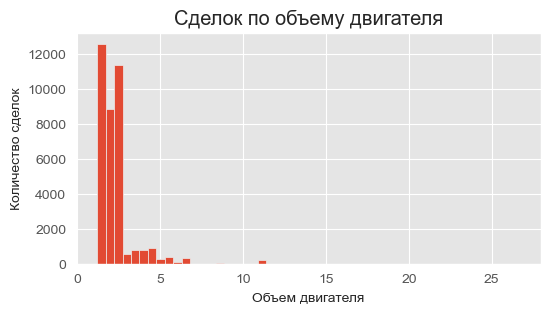

In [95]:
data.query('engine_volume != 999')['engine_volume'].hist(bins=50, figsize=(6, 3));
plt.title('Сделок по объему двигателя')
plt.xlabel("Объем двигателя")
plt.ylabel("Количество сделок")
plt.show()

In [96]:
data.query('engine_volume != 999')['engine_volume'].describe()

count    37121.000000
mean         2.354385
std          1.196515
min          1.200000
25%          1.600000
50%          2.000000
75%          2.693000
max         26.700000
Name: engine_volume, dtype: float64

Мы видим, что минимальный объем двигателя у нас 1,2 л, а максимум - 26 литров. Посмотрим на автомобили с объемом двигателя более 20 литров подробнее.

In [97]:
data.query('engine_volume > 20 & engine_volume < 999')

,year,month,company,brand,model,modification,release_year,manufacturing_country,fuel_type,engine_volume,transmission_type,drive_type,region,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013,sell_date
399,2019,апрель,Вираж,Chevrolet,Niva,легковой,2019,Республика Казахстан,Бензин,26.7,MT,AWD,Костанай,ЮЛ,1.0,10536.24452,10536.24452,Костанайская область,Внедорожники,Субкомпактные SUV,2019-04-01
400,2019,апрель,Вираж,Chevrolet,Niva,легковой,2019,Республика Казахстан,Бензин,25.7,MT,AWD,Атырау,ФЛ,1.0,10536.24452,10536.24452,Атырауская область,Внедорожники,Субкомпактные SUV,2019-04-01
401,2019,апрель,Вираж,Chevrolet,Niva,легковой,2019,Республика Казахстан,Бензин,24.7,MT,AWD,Костанай,ЮЛ,1.0,10536.24452,10536.24452,Костанайская область,Внедорожники,Субкомпактные SUV,2019-04-01
402,2019,апрель,Вираж,Chevrolet,Niva,легковой,2019,Республика Казахстан,Бензин,23.7,MT,AWD,Рудный,ФЛ,1.0,10536.24452,10536.24452,Костанайская область,Внедорожники,Субкомпактные SUV,2019-04-01
403,2019,апрель,Вираж,Chevrolet,Niva,легковой,2019,Республика Казахстан,Бензин,22.7,MT,AWD,Рудный,ЮЛ,1.0,10536.24452,10536.24452,Костанайская область,Внедорожники,Субкомпактные SUV,2019-04-01
404,2019,апрель,Вираж,Chevrolet,Niva,легковой,2019,Республика Казахстан,Бензин,21.7,MT,AWD,Нур-Султан,ФЛ,1.0,10536.24452,10536.24452,г.Нур-Султан,Внедорожники,Субкомпактные SUV,2019-04-01
405,2019,апрель,Вираж,Chevrolet,Niva,легковой,2019,Республика Казахстан,Бензин,20.7,MT,AWD,Караганда,ЮЛ,1.0,10536.24452,10536.24452,Карагандинская область,Внедорожники,Субкомпактные SUV,2019-04-01


[Chevrolet Niva](https://en.wikipedia.org/wiki/Lada_Niva_Travel) выпускались только с бензиновым двигателем 1,7 л, поэтому, в данных явна ошибка, и выгялидит она, как изменение порядкового номера, т.е. каждая строка отличается на 1 от предыдущей.  Проверим, может быть есть ошибки и у двиагтелей Нивы до 20 литров.

In [98]:
data.query('model == "Niva"')['engine_volume'].unique()

array([ 1.7, 26.7, 25.7, 24.7, 23.7, 22.7, 21.7, 20.7, 19.7, 18.7, 17.7,
       16.7, 15.7, 14.7, 13.7, 12.7, 11.7, 10.7,  9.7,  8.7,  7.7,  6.7,
        5.7,  4.7,  3.7,  2.7])

Да, действительно, выглядит, как будто в экселе протаскивали ячейку, и вместо копирования эксель прибовлял +1.  
Принудительно запишем 1,7 в объем двигателей Нивы.

In [99]:
data.loc[(data['model'] == "Niva") , 'engine_volume'] = 1.7
print('Объем двигателя у Niva в датафрейме', data.query('model == "Niva"')['engine_volume'].unique())

Объем двигателя у Niva в датафрейме [1.7]


Замена прошла успешно.  
Посмотрим еще раз на распределение объемов двигателей.

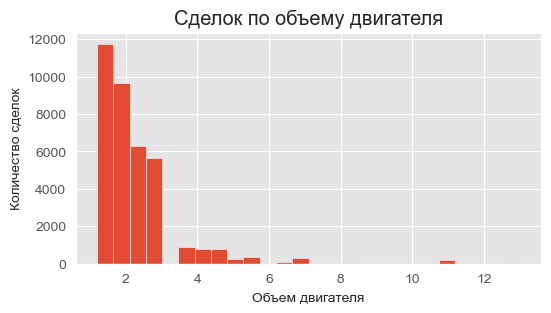

count    37121.000000
mean         2.345630
std          1.137624
min          1.200000
25%          1.600000
50%          2.000000
75%          2.693000
max         13.000000
Name: engine_volume, dtype: float64

In [100]:
data.query('engine_volume != 999')['engine_volume'].hist(bins=26, figsize=(6, 3));
plt.title('Сделок по объему двигателя')
plt.xlabel("Объем двигателя")
plt.ylabel("Количество сделок")
plt.show()

display(data.query('engine_volume != 999')['engine_volume'].describe())

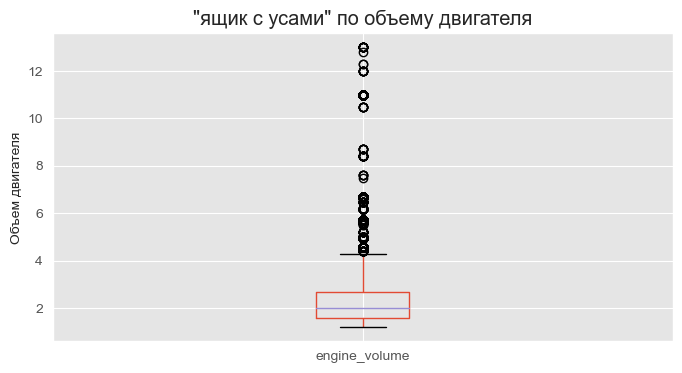

In [101]:
data.query('engine_volume != 999').boxplot(column='engine_volume', figsize=(8, 4))

plt.title('"ящик с усами" по объему двигателя')
plt.xlabel('')
plt.ylabel('Объем двигателя')
plt.show()

Мы видим, что большая часть автомобилей продавались с объемом до 4 литров. Медианное значение 2 литра. Минимальный объем - 1,2 литра, максимальный - 13 л.  
Для дальнейшего удобсва анализа поделим двигатели по объему на следующие типы:
- малый — от 1,1 до 1,8 л;
- средний — от 1,8 до 3,5 л;
- большой — от 3,5 до 5,0 л и выше;
- высший — более 5 л. 

Подготовим функцию, которая на вход будет принимать столбец с объемом двигателей, а на выходе выдавать категорию.

In [102]:
def engine_type (cell):
    if cell >= 999:
        return 'nodata'
    elif cell > 5:
        return 'высший'
    elif cell > 3.5:
        return 'большой'
    elif cell > 1.8:
        return 'средний'
    else:
        return 'малый'

Применим функцию.

In [103]:
data['engine_type'] = data['engine_volume'].apply(engine_type)

Посмотрим, как распределились сделки по категории объема двигаиеля.

высший      1032
большой     1914
nodata      2845
малый      13301
средний    20874
Name: engine_type, dtype: int64



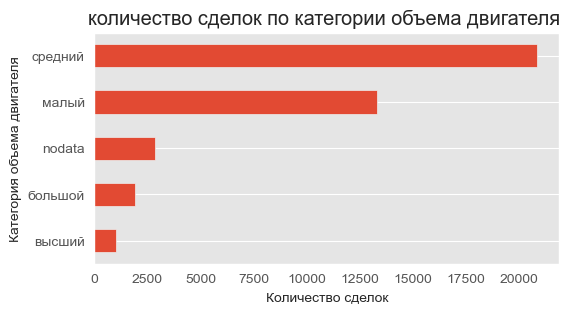

In [104]:
data['engine_type'].value_counts().sort_values().plot.barh(figsize=(6, 3))
plt.grid(axis='x')
plt.title("количество сделок по категории объема двигателя ")
plt.xlabel("Количество сделок")
plt.ylabel("Категория объема двигателя");

print(data['engine_type'].value_counts().sort_values())
print()

Мы видим, что больше всего сделок было по автомобилем со средним объемом двигателя, потом с малым, меньше всего по авто с высшим объемом двигателя.

### Цена автомобиля

Посмотрим, как распределены сделки с автомобилямипо цене авто.

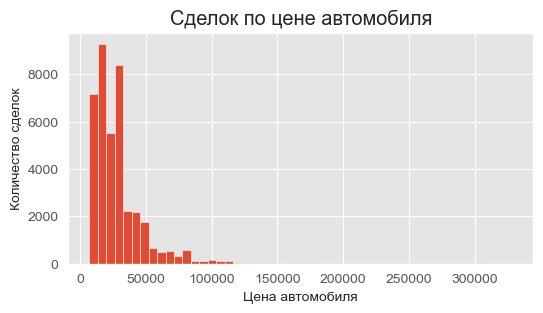

count     39966.000000
mean      28250.157462
std       20005.756629
min        7100.000000
25%       15518.499690
50%       24282.267910
75%       32505.655770
max      328510.970600
Name: price_usd, dtype: float64


In [105]:
data['price_usd'].hist(bins=50, figsize=(6, 3));
plt.title('Сделок по цене автомобиля')
plt.xlabel("Цена автомобиля")
plt.ylabel("Количество сделок")
plt.show()

print(data['price_usd'].describe())

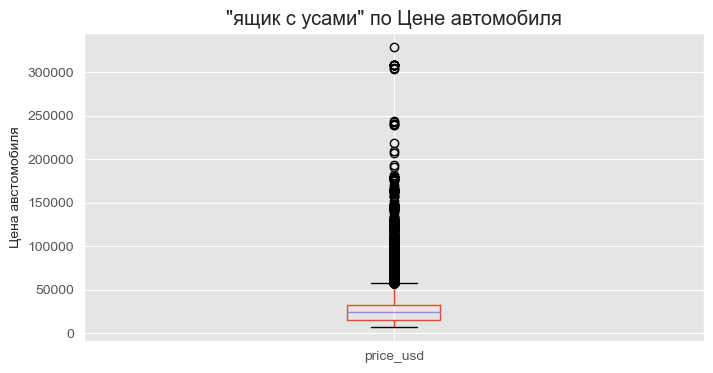

In [106]:
data.boxplot(column='price_usd', figsize=(8, 4))

plt.title('"ящик с усами" по Цене автомобиля')
plt.xlabel('')
plt.ylabel('Цена австомобиля')
plt.show()

Мы видим, что большая часть автомобилей была по цене до 60 000 USD, посмотрим на автомобили дороже подробнее.

In [107]:
data.query('price_usd > 100000').groupby(['brand', 'model', 'segment_2013']).agg({'quantity':'count'})

quantity
brand                model             segment_2013                     
ANKAI                HF-D105           Коммерческие автомобили        30
                     HFF6124G03EV3     Коммерческие автомобили        10
                     HFF6127GZ-4       Коммерческие автомобили        20
Audi                 A8                Легковые автомобили             3
                     Q8                Внедорожники                    6
                     RS5               Легковые автомобили             1
BMW                  5 серия           Легковые автомобили             2
                     7 серия           Легковые автомобили             3
                     8 серия           Легковые автомобили             1
                     X6                Внедорожники                    2
                     X7                Внедорожники                   15
                     i8                Легковые автомобили             1
Cadillac             Escalade          Внедорожники                    5
Daewoo               BC 211 MA         Коммерческие автомобили         1
                     BS 106 A          Коммерческие автомобили         3
Hyundai Truck & Bus  Universe          Коммерческие автомобили         7
Jac                  N120              Коммерческие автомобили         1
Jaguar               F-Type            Легковые автомобили             1
                     I-Pace            Внедорожники                    4
KAMAZ                6520              Коммерческие автомобили         1
Land Rover           Discovery         Внедорожники                    2
                     Range Rover       Внедорожники                   61
                     Range Rover Sport Внедорожники                   15
Lexus                LS                Легковые автомобили             9
                     LX                Внедорожники                  170
MAN                  TG                Коммерческие автомобили         9
Mercedes-Benz        G-Class           Внедорожники                   31
                     S-Class           Легковые автомобили             4
Mercedes-Benz Trucks Actros            Коммерческие автомобили         1
                     Setra             Коммерческие автомобили         1
                     Tourismo          Коммерческие автомобили         2
Nefaz                5299              Коммерческие автомобили         1
Porsche              911 Carrera S     Легковые автомобили             1
                     Cayenne           Внедорожники                   15
                     Panamera          Легковые автомобили             7
Scania               G-Series          Коммерческие автомобили         1
                     R-Series          Коммерческие автомобили         6

Мы видим, что дороже 100 000 USD продаются элитные автомобили, автобусы и грузовые машины, никаких противоречий.

Посмотрим на автомобили, дороже 300 000 USD.

In [108]:
data.query('price_usd > 300000')

,year,month,company,brand,model,modification,release_year,manufacturing_country,fuel_type,engine_volume,transmission_type,drive_type,region,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013,sell_date,engine_type
20402,2019,май,Autokapital,Mercedes-Benz Trucks,Tourismo,15 RHD,2019,Турция,Дизель,12.0,AT,RWD,Атырау,nodata,1.0,305252.0154,305252.0154,Атырауская область,Коммерческие автомобили,Большие автобусы,2019-05-01,высший
20403,2019,июнь,Autokapital,Mercedes-Benz Trucks,Tourismo,15 RHD,2019,Турция,Дизель,12.0,AT,RWD,Атырау,nodata,1.0,303650.8783,303650.8783,Атырауская область,Коммерческие автомобили,Большие автобусы,2019-06-01,высший
39818,2019,июль,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,Республика Казахстан,Электричество,999.0,nodata,2WD,Костанай,ЮЛ,1.0,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,2019-07-01,nodata
39819,2019,июль,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,Республика Казахстан,Электричество,999.0,nodata,2WD,Костанай,ЮЛ,1.0,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,2019-07-01,nodata
39820,2019,июль,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,Республика Казахстан,Электричество,999.0,nodata,2WD,Костанай,ЮЛ,1.0,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,2019-07-01,nodata
39821,2019,июль,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,Республика Казахстан,Электричество,999.0,nodata,2WD,Костанай,ЮЛ,1.0,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,2019-07-01,nodata
39822,2019,июль,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,Республика Казахстан,Электричество,999.0,nodata,2WD,Костанай,ЮЛ,1.0,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,2019-07-01,nodata
39823,2019,июль,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,Республика Казахстан,Электричество,999.0,nodata,2WD,Костанай,ЮЛ,1.0,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,2019-07-01,nodata
39824,2019,июль,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,Республика Казахстан,Электричество,999.0,nodata,2WD,Костанай,ЮЛ,1.0,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,2019-07-01,nodata
39825,2019,июль,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,Республика Казахстан,Электричество,999.0,nodata,2WD,Костанай,ЮЛ,1.0,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,2019-07-01,nodata


В списке только автобусы, поиск в интернете говорит, что электроавтобусы [ANKAI](https://www.alibaba.com/product-detail/China-brand-High-quality-12m-EV_62530346526.html) действительно могут стоить 300 000 USD, поэтому данные введены, скорее всего, верно.

Также проверим самые дешевые машины, дешевле 10 000 USD.

In [109]:
data.query('price_usd < 8000').groupby(['brand', 'model', 'segment_2013']).agg({'quantity':'count'})

quantity
brand model  segment_2013                     
Jac   X200   Коммерческие автомобили         2
Lada  Granta Легковые автомобили           388
      Kalina Легковые автомобили             1
UAZ   3741   Коммерческие автомобили        34

Мы видим, что в списке автомобили из СНГ и Китая, они стоят, обычно, дешевле западных автомобилей.  
Смущает, что в списке есть коммерческий автомобиль, но Jac X200 [сейчас продается](https://www.alibaba.com/product-detail/MINI-CARGO-TRUCK-X200-FOR-JAC_11000006317636.html) до 8 000 USD в Китае, поэтому, читаем, что цена записана верной.

Таким образом:
- самая дешевая сделка была по автомобилю ценой 7 100 USD,
- самая дорогая сделка была по автомобилю ценой 328 510 USD,
- средняя цена авто была 28 250 USD,
- медианная цена авто 24 282 USD.

### Количество проданных автомобилей

Посмотрим, как распределено количество проданных автомобилей по сделкам.

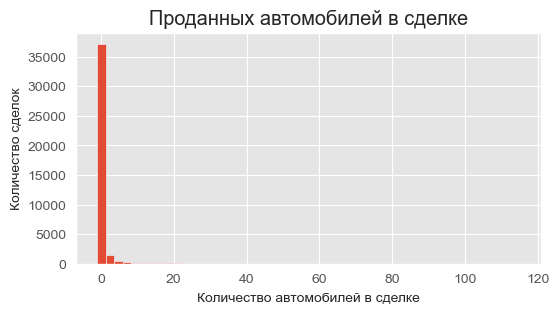

count    39960.000000
mean         1.348198
std          2.373089
min         -1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        115.000000
Name: quantity, dtype: float64


In [110]:
data['quantity'].hist(bins=50, figsize=(6, 3));
plt.title('Проданных автомобилей в сделке')
plt.xlabel("Количество автомобилей в сделке")
plt.ylabel("Количество сделок")
plt.show()

print(data['quantity'].describe())

Мы видим, что 75% сделок происходят с одним автомобилем, что логично, т.к. обычно один покупатель покупает себе один автомобиль. Но у нас есть отрицательное количество автомобилей, что странно, а аткже 115 автомсобилей, посмотрми на эти строки подробнее.

In [111]:
data.query('quantity <= 0')

,year,month,company,brand,model,modification,release_year,manufacturing_country,fuel_type,engine_volume,transmission_type,drive_type,region,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013,sell_date,engine_type
25728,2019,август,БИПЭК АВТО,Skoda,Superb,NaN,2019,Республика Казахстан,Бензин,2.0,AT,AWD,Тараз,nodata,-1.0,35588.25,-35588.25,Жамбылская область,Легковые автомобили,D класс,2019-08-01,средний


Мы видим, что есть только одна сделка на 1 автомобиль с отрицательным количеством авто в сделке, и это значит, что либо автомобиль вернули, что маловероятно, т.к. эту строку не вносили бы в этот отчет просто, или что при внесении данных персонал просто ошибся, и это отрицательное количество повлияло на сумму сделки. Исправим это. 

In [112]:
#Получаем индекс строки с отрицательным значением 
minus_index = data.query('quantity <= 0').index

#умножаем количество на минус один
data.iloc[minus_index, 14] = data.iloc[25728, 14] * (-1)
#умножаем сумму сделки на минус один
data.iloc[minus_index, 16] = data.iloc[25728, 16] * (-1)
display(data.iloc[minus_index])

,year,month,company,brand,model,modification,release_year,manufacturing_country,fuel_type,engine_volume,transmission_type,drive_type,region,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013,sell_date,engine_type
25728,2019,август,БИПЭК АВТО,Skoda,Superb,NaN,2019,Республика Казахстан,Бензин,2.0,AT,AWD,Тараз,nodata,1.0,35588.25,35588.25,Жамбылская область,Легковые автомобили,D класс,2019-08-01,средний


Мы исправили значение.  
Теперь посмотрим на сделки, где продано более 100 автомобилей.

In [113]:
data.query('quantity > 100')

,year,month,company,brand,model,modification,release_year,manufacturing_country,fuel_type,engine_volume,transmission_type,drive_type,region,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013,sell_date,engine_type
16885,2019,май,БИПЭК АВТО,Lada,4x4,NaN,2019,Республика Казахстан,Бензин,1.69,MT,AWD,Тараз,ЮЛ,115.0,9000.0,1035000.0,Жамбылская область,Внедорожники,Субкомпактные SUV,2019-05-01,малый


Мы видим, что была только одна сделка, где приобрели 115 автомобилей LADA 4x4, и это могли быть или такси, но тогда выборр автомобиля не самый очевидный, или т..к это в городе [Тараз](https://w.wiki/8$24), то автомобили могли приобрети для работы на Айрактинском газоконденсатном месторождении, или другом предприятии, которых в городе есть несколько.

Также у нас в этом столбце оставились пропуски, посмотрим сколько их.

In [114]:
display(data.isna().sum())

year                        0
month                       0
company                     0
brand                       0
model                       0
modification             3591
release_year                0
manufacturing_country       0
fuel_type                   0
engine_volume               0
transmission_type           0
drive_type                  0
region                      0
client_type                 0
quantity                    6
price_usd                   0
sell_price_usd              0
state                       0
segment_2013                0
class_2013                  0
sell_date                   0
engine_type                 0
dtype: int64

Мы видим, что таких строк всего 6, посмотрим на них.

In [115]:
display(data[data['quantity'].isna()])

,year,month,company,brand,model,modification,release_year,manufacturing_country,fuel_type,engine_volume,transmission_type,drive_type,region,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013,sell_date,engine_type
16741,2019,август,БИПЭК АВТО,Kia,Sportage,NaN,2019,Республика Казахстан,Бензин,1.999,AT,AWD,Караганда,nodata,NaN,20700.0,0.0,Карагандинская область,Внедорожники,Компактные SUV,2019-08-01,средний
17368,2019,август,БИПЭК АВТО,Lada,Granta,NaN,2019,Республика Казахстан,Бензин,1.596,MT,FWD,Алматы,nodata,NaN,7100.0,0.0,г.Алматы,Легковые автомобили,B класс,2019-08-01,малый
18676,2019,август,БИПЭК АВТО,Lada,XRAY,NaN,2018,Республика Казахстан,Бензин,1.596,MT,FWD,Экибастуз,nodata,NaN,13800.0,0.0,Павлодарская область,Легковые автомобили,B класс,2019-08-01,малый
37416,2019,август,БИПЭК АВТО,UAZ,3909,NaN,2018,Республика Казахстан,Бензин,2.693,MT,AWD,Алматы,nodata,NaN,11200.0,0.0,г.Алматы,Коммерческие автомобили,Развозные автомобили,2019-08-01,средний
37727,2019,август,БИПЭК АВТО,UAZ,Patriot,NaN,2018,Республика Казахстан,Бензин,2.693,MT,AWD,Семей,nodata,NaN,13800.0,0.0,Восточно-Казахстанская область,Внедорожники,Среднеразмерные SUV,2019-08-01,средний
38775,2019,август,БИПЭК АВТО,Skoda,Kodiaq,NaN,2019,Республика Казахстан,Бензин,2.000,AT,AWD,Нур-Султан,nodata,NaN,40000.0,0.0,г.Нур-Султан,Внедорожники,Полноразмерные SUV,2019-08-01,средний


Это строки от БИПЭК АВТО, в сумме сделки этих сделок мы видим 0, т.е. мы не сможем восстановить количество машин, такие строки никак не помогут нам в анализе, и их мало, удалим их.

In [116]:
data = data.dropna(subset=['quantity'])
print('Строк в с пропусками в столбце quantity - ', data['quantity'].isna().sum())

Строк в с пропусками в столбце quantity -  0


Уделение строк прошло успешно.

### Сумма сделки продажи автомобилей

Посмотрим, какая была сумма сделок.

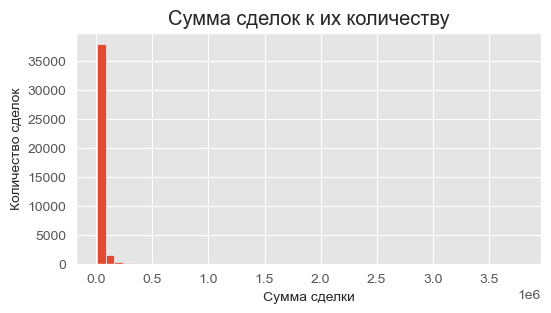

count    3.996000e+04
mean     3.376452e+04
std      5.070338e+04
min      7.100000e+03
25%      1.662353e+04
50%      2.624896e+04
75%      3.500000e+04
max      3.778206e+06
Name: sell_price_usd, dtype: float64


In [117]:
data['sell_price_usd'].hist(bins=50, figsize=(6, 3));
plt.title('Сумма сделок к их количеству')
plt.xlabel("Сумма сделки")
plt.ylabel("Количество сделок")
plt.show()

print(data['sell_price_usd'].describe())

Мы видим, что большая часть сделок была до 35 000 USD, но есть сделки до 3,7 миллионов USD. Посмотрим на сделки свыше 1 000 000 USD подробнее.

In [118]:
data.query('sell_price_usd > 1000000').groupby(['brand', 
                                               'model', 
                                               'segment_2013']).agg({'model':'count', 
                                                                     'quantity':'sum'}).rename(columns={"model":"count", 
                                                                                                        "quantity":"sum"})

count    sum
brand         model     segment_2013                         
Daewoo        BC 095    Коммерческие автомобили      2   80.0
              BC 211 MA Коммерческие автомобили      1   30.0
              BS 106 D  Коммерческие автомобили      1   16.0
Jac           S3        Внедорожники                 1   70.0
Lada          4x4       Внедорожники                 1  115.0
MAN           TG        Коммерческие автомобили      3   44.0
Mercedes-Benz G-Class   Внедорожники                 2   14.0
Skoda         Octavia   Легковые автомобили          1  100.0
Volkswagen    Polo      Легковые автомобили          1   79.0

Мы видим, что это единичные сделки на большое количество автомобилей, никаких противоречий нет.  

Также проверим, есть ли у нас сделки с суммой меньше, чем минимальная цена автомобиля.

In [119]:
min_price = data['price_usd'].min()
display(data.query('sell_price_usd < @min_price'))

,year,month,company,brand,model,modification,release_year,manufacturing_country,fuel_type,engine_volume,transmission_type,drive_type,region,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013,sell_date,engine_type


Таких строк нет.

Посчитаем разницу, между ценой автомобиля, умноженной на количество в сделке на сумму сделки, чтобы понять, продают автомобили со скидкой, обынчо, или с наценкой.

In [120]:
data['markup_discount'] = (
    ((data['sell_price_usd'] / data['quantity']) - data['price_usd']) * 100 / data['price_usd']).round(2)
    

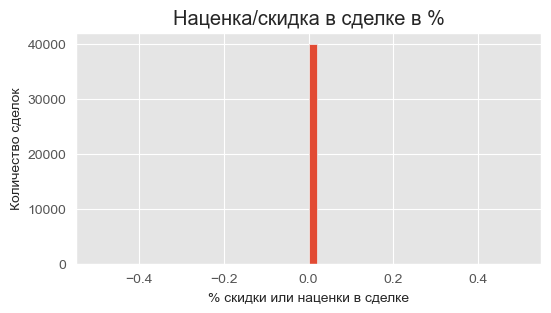

count    39960.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: markup_discount, dtype: float64


In [121]:
data['markup_discount'].hist(bins=50, figsize=(6, 3));
plt.title('Наценка/скидка в сделке в %')
plt.xlabel("% скидки или наценки в сделке")
plt.ylabel("Количество сделок")
plt.show()

print(data['markup_discount'].describe())

Мы видим, что почти нет скидок, относительно цены автомобиля.

**Вывод**  
- больше всего сделок было по автомобилем со средним объемом двигателя, потом с малым, меньше всего по авто с высшим объемом двигателя;
- средняя цена автомобиля - 28250 USD, медианная 24282 USD, минимальная - 7100 USD, максимальная -  328510 USD за автобус Mercedes-Benz Trucks, 75% сделовк было с автомобилями ценой до 32 5050 USD, самые дорогие автомобили - элитные и коммерческий транспорт,  самые дешевые - легковые автомобили из СНГ и Китая;
- 75% сделок происходят с одним автомобилем, что логично, т.к. обычно один покупатель покупает себе один автомобиль, больше всего за одну сделку было продано 115 автомобилей;
- средняя сумма сделки - 33764 USD, медианная. - 26249 USD, 75% сделок было сделано на сумму до 35 000 USD, минимальная сумма сделки - 7100 USD, максимальная 3 778 206 USD, сумма сделки равна произведению цены автомобиля  на количество.

## Анализ рынка автомобилей Казахстана

Проанализируем, как выглядел рынок автомобилей в Казахстане в 2019 году.

### Самая популярная марка автомобиля

Посмотрим на топ 5 марок автомобилей по количеству проданных автомобилей.

,quantity,persent
brand,,
Lada,11092.0,20.59
Toyota,10745.0,19.94
Hyundai,10168.0,18.87
Kia,2358.0,4.38
Jac,2099.0,3.90


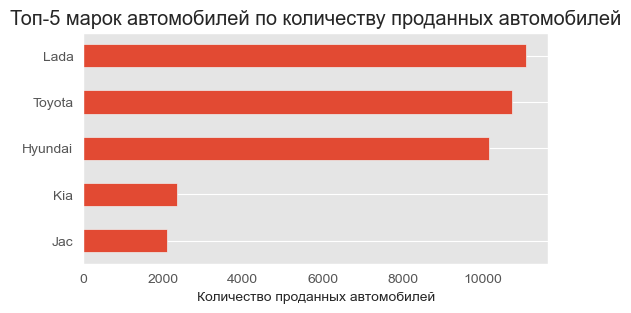

In [122]:
top_5_brand = data.groupby(['brand']).agg({'quantity':'sum'}).sort_values(by='quantity', ascending=False).head()
top_5_brand['persent'] = (top_5_brand * 100 / data['quantity'].sum()).round(2)

top_5_brand['quantity'].sort_values(ascending=True).head().plot.barh(figsize=(6, 3),
                                                                                                            legend=False)
plt.grid(axis='x')
plt.title("Топ-5 марок автомобилей по количеству проданных автомобилей")
plt.xlabel("Количество проданных автомобилей")
plt.ylabel("");

display(top_5_brand)

С большим отрывом видна тройка лидеров производителей: 1 место - Lada (11092 автомобилей? 20,5% рынка), 2 - Toyota (10745 автомобилей, 20% рынка), 3- Hyundai (10168 автомобилей, 19% рынка).

Посмотрим, марок каких автомобилей было продано меньше всего.

In [123]:
data.groupby(['brand']).agg({'quantity':'sum'}) .sort_values(by='quantity', ascending=False).tail(3)

,quantity
brand,
Mini,16.0
Ford,3.0
Nefaz,1.0


Nefaz является самой непопулярной маркой машины, в 2019 году был продан только 1 автобус.

### Самая популярная модель автомобиля

quantity  persent
brand   model                    
Toyota  Camry     4853.0     9.01
Lada    Granta    3664.0     6.80
Hyundai Tucson    3271.0     6.07
Lada    Vesta     2653.0     4.92
        4x4       2469.0     4.58

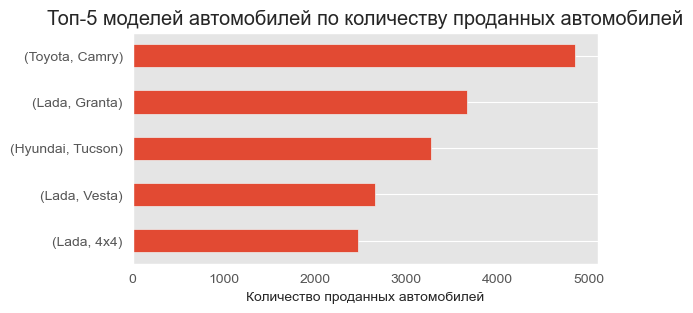

In [124]:

top_5_models = data.groupby(['brand', 'model']).agg({'quantity':'sum'}) .sort_values(by='quantity', ascending=False).head()
top_5_models['persent'] = (top_5_models * 100 / data['quantity'].sum()).round(2)

top_5_models['quantity'].sort_values(ascending=True).head().plot.barh(figsize=(6, 3),
                                                                                                            legend=False)
plt.grid(axis='x')
plt.title("Топ-5 моделей автомобилей по количеству проданных автомобилей")
plt.xlabel("Количество проданных автомобилей")
plt.ylabel("");

display(top_5_models)

Самой популярной моделью автомобиля является Toyota Camry (4853 автомобилей, 9% рынка), на втором месте - Lada Granta (3664 автомобилей, 6,8% рынка), на третьем - Hyundai Tucson (3271 автомобилей, 6,1% рынка).

### Самая популярная страна производитель

Посмотрим на Топ-5 стран производителей по количеству проданных автомобилей.

,quantity,persent
manufacturing_country,,
Республика Казахстан,31367.0,58.22
Российская Федерация,14341.0,26.62
Япония,4612.0,8.56
Турция,1167.0,2.17
Таиланд,981.0,1.82


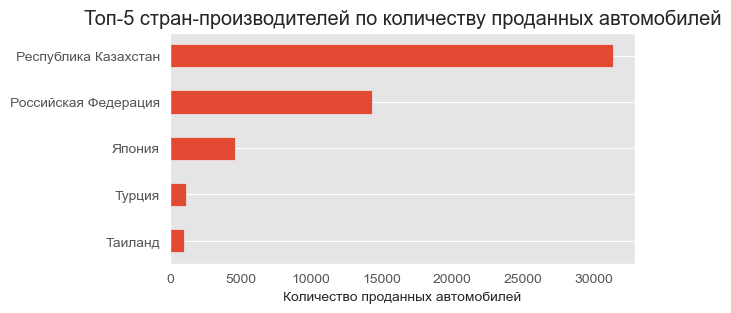

In [125]:
top_5_countries = (data
                  .groupby(['manufacturing_country'])
                  .agg({'quantity':'sum'})
                  .sort_values(by='quantity', ascending=False)
                  .head())

top_5_countries['persent'] = (top_5_countries * 100 / data['quantity'].sum()).round(2)

top_5_countries['quantity'].sort_values(ascending=True).head().plot.barh(figsize=(6, 3),
                                                                                                            legend=False)
plt.grid(axis='x')
plt.title("Топ-5 стран-производителей по количеству проданных автомобилей")
plt.xlabel("Количество проданных автомобилей")
plt.ylabel("");

display(top_5_countries)


Более половины автомобилей, проданных в 2019 году были собраны в Казахстане (31367 автомобилей, 58% рынка), на втором месте - Россия (14341 автомобилей, 27% рынка), на третьем месте - Япония (4612 автомобилей, 9% рынка).

### Самый популярный тип топлива проданных автомобилей

Посмотрим, как распределены проданные автомобили по типу топлива.

,fuel_type,quantity
0,Бензин,48111.0
1,nodata,3508.0
2,Дизель,2234.0
3,Электричество,13.0
4,гибрид,10.0


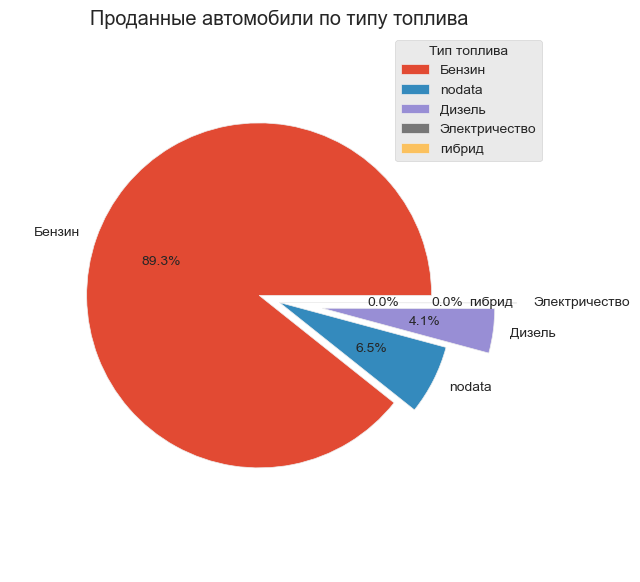

In [126]:
top_5_fuel= (data
                  .groupby(['fuel_type'])
                  .agg({'quantity':'sum'})
                  .sort_values(by='quantity', ascending=False)
                  .reset_index())


display(top_5_fuel)

explode = (0.1, 0.0, 0.2, 0.3, 0.0)

fig, ax = plt.subplots(figsize=(10, 7))

plt.pie(top_5_fuel['quantity'], 
        labels = top_5_fuel['fuel_type'], 
        autopct='%1.1f%%', 
        radius=0.8,
        explode=explode);
plt.title('Проданные автомобили по типу топлива')
plt.legend(loc='upper right', title = 'Тип топлива')
plt.show()



89% проданных в 2019 году автомобилей были на бензине, по 6,5% у нас нет данных, а на дизеле 4,1%. Доля гибридных и электроавтомобилей менее 1%.

### Самый популярный объем двигатлея проданных автомобилей

Посмотрим, как распределены проданные автомобили по объему двигателя.  
Ранее мы поделили двигатели на категории по объему:
- малый — от 1,1 до 1,8 л;
- средний — от 1,8 до 3,5 л;
- большой — от 3,5 до 5,0 л и выше;
- высший — более 5 л. 

,engine_type,quantity
0,малый,23909.0
1,средний,22906.0
2,nodata,3976.0
3,большой,2003.0
4,высший,1082.0


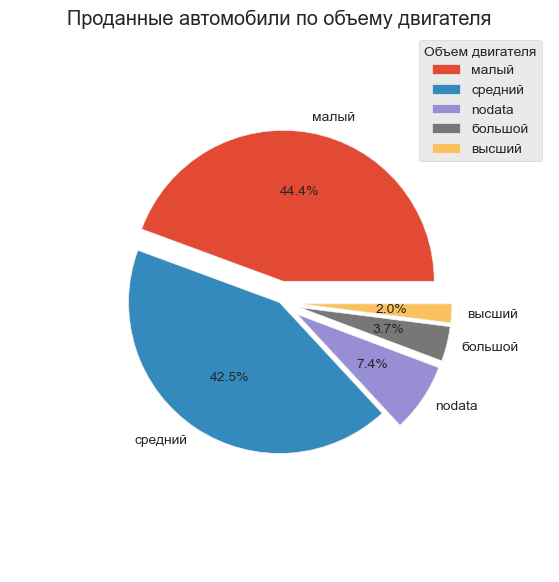

In [127]:
top_engine= (data
                  .groupby(['engine_type'])
                  .agg({'quantity':'sum'})
                  .sort_values(by='quantity', ascending=False)
                  .reset_index())


display(top_engine)

explode = (0.1, 0.0, 0.1, 0.1, 0.1)

fig, ax = plt.subplots(figsize=(10, 7))

plt.pie(top_engine['quantity'], 
        labels = top_engine['engine_type'], 
        autopct='%1.1f%%', 
        radius=0.7,
        explode=explode);
plt.title('Проданные автомобили по объему двигателя')
plt.legend(loc='upper right', title = 'Объем двигателя')
plt.show()

44,5% рынка автомобилей были с малы объемом двигателя (от 1,1 до 1,8 л), 42,5 % со средним (от 1,8 до 3,5 л).

### Самый популярный тип коробки проданных автомобилей

Посмотрим, как распределены проданные автомобили по типу коробки передач.  

,drive_type,quantity
0,FWD,22312.0
1,AWD,18878.0
2,2WD,7836.0
3,nodata,2770.0
4,RWD,2080.0


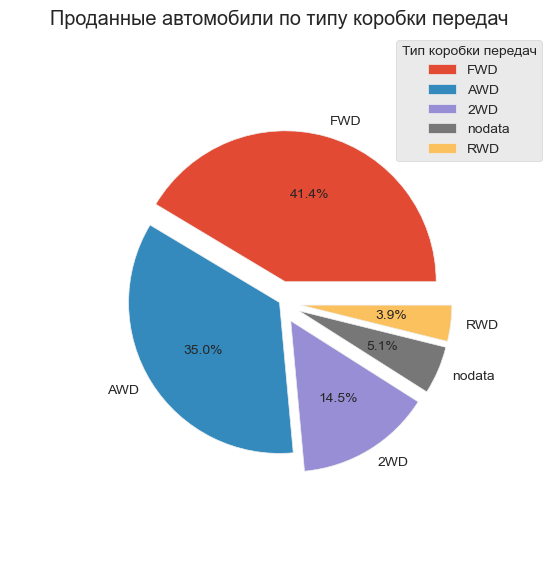

In [128]:
top_drive = (data
                  .groupby(['drive_type'])
                  .agg({'quantity':'sum'})
                  .sort_values(by='quantity', ascending=False)
                  .reset_index())


display(top_drive)

explode = (0.1, 0.0, 0.1, 0.1, 0.1)

fig, ax = plt.subplots(figsize=(10, 7))

plt.pie(top_drive['quantity'], 
        labels = top_drive['drive_type'], 
        autopct='%1.1f%%', 
        radius=0.7, 
        explode=explode);
plt.title('Проданные автомобили по типу коробки передач')
plt.legend(loc='upper right', title = 'Тип коробки передач')
plt.show()

41,4% проданных автомобилей были с передним приводом, 35% - с полным приводом.

### Самый популярный сегмент проданных автомобилей

Посмотрим, как распределены проданные автомобили по сегменту.

,segment_2013,quantity
0,Легковые автомобили,23836.0
1,Внедорожники,21994.0
2,Коммерческие автомобили,5246.0
3,Минивэны,1824.0
4,Пикапы,976.0


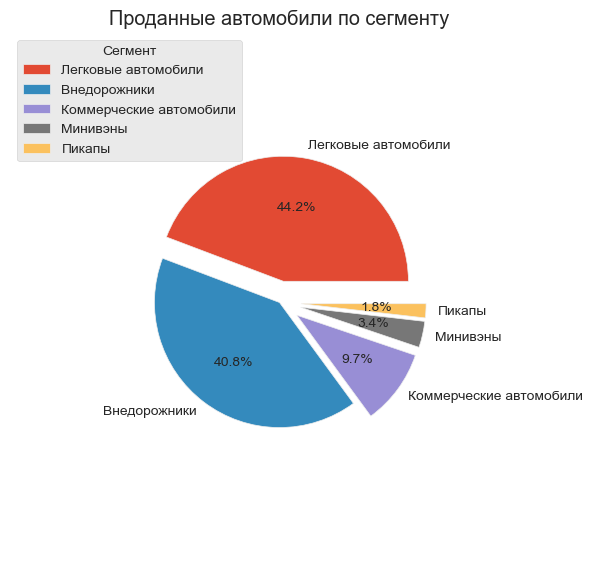

In [129]:
top_segment = (data
                  .groupby(['segment_2013'])
                  .agg({'quantity':'sum'})
                  .sort_values(by='quantity', ascending=False)
                  .reset_index())


display(top_segment)

explode = (0.1, 0.0, 0.1, 0.1, 0.1)

fig, ax = plt.subplots(figsize=(10, 7))

plt.pie(top_segment['quantity'], 
        labels = top_segment['segment_2013'], 
        autopct='%1.1f%%', 
        radius=0.58,
        explode=explode);
plt.title('Проданные автомобили по сегменту')
plt.legend(loc='upper left', title = 'Сегмент')
plt.show()

44,2% проданных автомобилей были легковыми, 40,8% - внедорожниками.

### Кто чаще приобретает автомобили

Посмотрим, кто чаще приобретает автомобили: филические лица или юридические.

,client_type,quantity,amount_of_sales
0,ФЛ,24742.0,6.993073e+08
1,ЮЛ,22801.0,4.944462e+08
2,nodata,6333.0,1.554767e+08


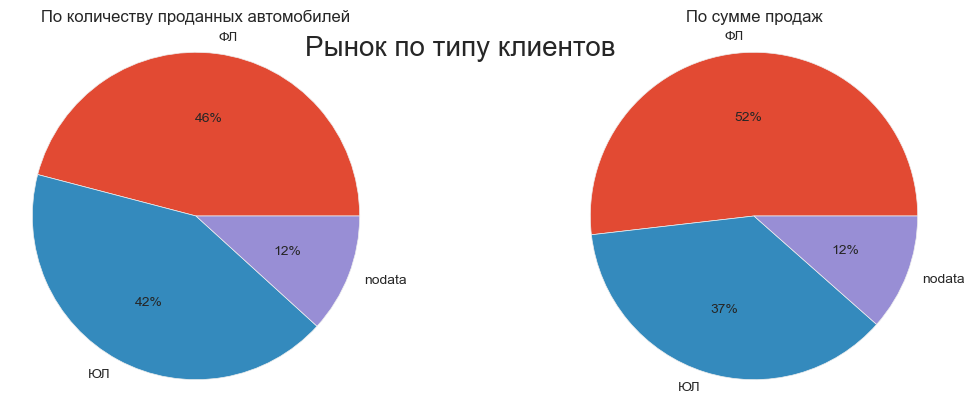

In [130]:
clients_type = (data
                  .groupby(['client_type'])
                  .agg({'quantity':'sum', 'sell_price_usd':'sum'})
                  .sort_values(by='quantity', ascending=False)
                  .reset_index()
                  .rename(columns={"sell_price_usd":"amount_of_sales"}))


display(clients_type)


#задаем размеры общего графика
fig, ax = plt.subplots(1, 2, figsize=(12,8))
fig.subplots_adjust(top=1.4, wspace= 0.5,)
fig.suptitle('Рынок по типу клиентов', fontsize=20)
#создаем круговую диаграмму по количеству проданных авто
ax[0].pie(clients_type['quantity'],
          labels=clients_type['client_type'],
          radius = 1.1,
          autopct='%.0f%%')
ax[0].set_title('По количеству проданных автомобилей', fontsize=12)


# создаем график распределения сумме продаж
ax[1].pie(clients_type['amount_of_sales'],
          labels=clients_type['client_type'],
          radius = 1.1,
          autopct='%.0f%%')
ax[1].set_title('По сумме продаж', fontsize=12)


plt.show()

Физические лица больше покупают автомобили, как в количественном, так и в денежном эквиваленте - 46% по количеству автомобилей, 52% по сумме продаж, юрилические лица - 42% по количеству автомобилей и 37% по сумме продаж, по 12% у нас нет данных.

### Объем рынка

Посчитаем размер рынка на основе данных внутренних продаж всех игроков рынка за расчетный период.  
Т.к. неправильно считать размер рынка физических и юридических лиц, разделим, а также разделим по регионам. Считать объем рынка мы будем в сумме стоимостей проданных автомобилей.

client_type,region,nodata,ФЛ,ЮЛ
2,Алматы,4.970439e+07,2.300684e+08,1.467012e+08
11,Нур-Султан,2.724422e+07,1.758023e+08,8.962915e+07
23,Шымкент,5.834585e+06,5.732342e+07,1.865896e+07
3,Атырау,9.321654e+06,3.680172e+07,2.847904e+07
5,Караганда,9.795496e+06,3.182891e+07,1.833534e+07
8,Костанай,9.290216e+06,2.893119e+07,4.962024e+07
21,Уральск,5.942944e+06,2.481313e+07,1.507383e+07
1,Актобе,4.927675e+06,2.286283e+07,1.642467e+07
0,Актау,4.126639e+06,2.190451e+07,2.069635e+07
12,Павлодар,4.352219e+06,2.098607e+07,8.907352e+06


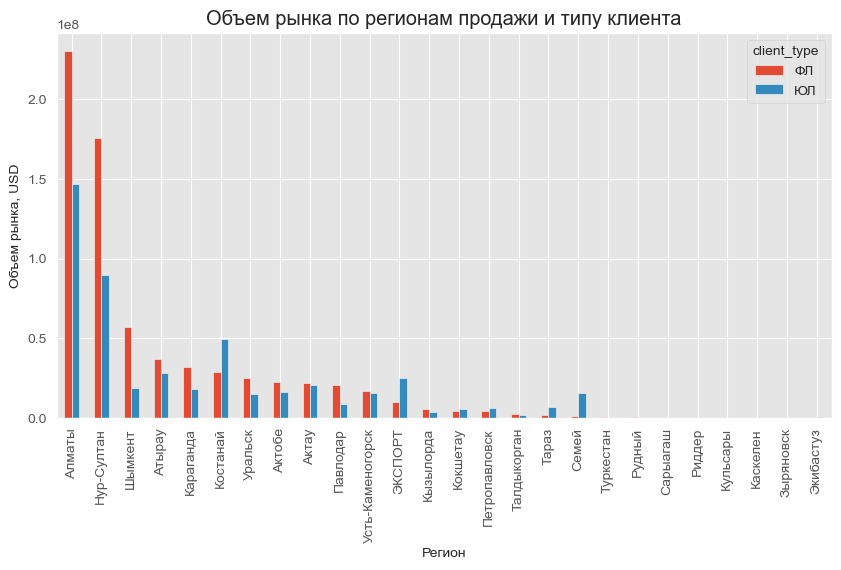

In [131]:
market_size = (pd.pivot_table(data,
                              values='sell_price_usd',
                              index='region',
                              columns='client_type',
                              aggfunc="sum",
                              fill_value=0)
               .reset_index()
               .sort_values(by='ФЛ', ascending = False))
display(market_size)

market_size.plot(x='region', y=['ФЛ','ЮЛ'],
         kind="bar", figsize=(10,5), 
         title = 'Объем рынка по регионам продажи и типу клиента')
plt.xlabel('Регион')
plt.ylabel('Объем рынка, USD')
plt.show()

Алматы и Нур-Султан на первом месте, что логично, т.к. это самый крупный город Казахстана и столица, соответствеено.  
На первый взгляд, объем рынка зависит от средней заработной платы, но [статистика за 2019 год](https://www.zakon.kz/finansy/4993404-srednemesyachnaya-zarabotnaya-plata-za.html) указывает, что на первом месте Атырау, а в Шымкете средняя заработная плата ниже срежней по стране.

![Разница в средней ЗП КАзахстан 2019 3 квартал](https://www.zakon.kz/pbi/WEBP/2024-01-30/file-09386266-07e2-4e9c-878b-3abb16834617/571x763.webp)


Также не наблюдается прямой зависимости, между объемом рынка и населением региона, согласно [переписи населения 2021 года](https://w.wiki/93eC).

Посмотрим на продажи, основываясь не на том, где продают автомобитли, а в том в какой регион их продают.

client_type,state,nodata,ФЛ,ЮЛ
16,г.Алматы,4.970439e+07,2.300684e+08,1.467012e+08
17,г.Нур-Султан,2.724422e+07,1.758023e+08,8.962915e+07
15,Южно-Казахстанская область,5.834585e+06,5.732342e+07,1.865896e+07
3,Атырауская область,9.321654e+06,3.680172e+07,2.859416e+07
7,Карагандинская область,9.795496e+06,3.182891e+07,1.833534e+07
8,Костанайская область,9.290216e+06,2.929835e+07,4.974593e+07
6,Западно-Казахстанская область,5.942944e+06,2.481313e+07,1.507383e+07
1,Актюбинская область,4.927675e+06,2.286283e+07,1.642467e+07
10,Мангистауская область,4.126639e+06,2.190451e+07,2.069635e+07
11,Павлодарская область,5.617507e+06,2.098607e+07,9.470752e+06


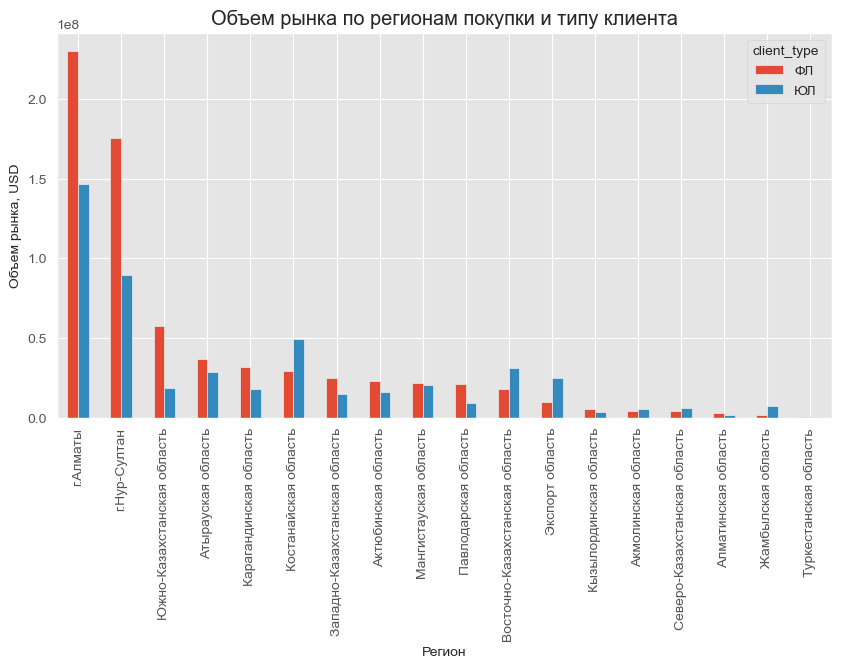

In [132]:
market_size_reg = (pd.pivot_table(data,
                              values='sell_price_usd',
                              index='state',
                              columns='client_type',
                              aggfunc="sum",
                              fill_value=0)
               .reset_index()
               .sort_values(by='ФЛ', ascending = False))
display(market_size_reg)

market_size_reg.plot(x='state', y=['ФЛ','ЮЛ'],
         kind="bar", figsize=(10,5), 
         title = 'Объем рынка по регионам покупки и типу клиента')
plt.xlabel('Регион')
plt.ylabel('Объем рынка, USD')
plt.show()

В таком виде больше мы видим большее совпадение со средней заработной платой в регионе в регионе.

**Вывод**  
- С большим отрывом видна тройка лидеров производителей: 1 место - Lada (11092 автомобилей? 20,5% рынка), 2 - Toyota (10745 автомобилей, 20% рынка), 3- Hyundai (10168 автомобилей, 19% рынка). Nefaz является самой непопулярной маркой машины, в 2019 году был продан только 1 автобус.
- Самой популярной моделью автомобиля является Toyota Camry (4853 автомобилей, 9% рынка), на втором месте - Lada Granta (3664 автомобилей, 6,8% рынка), на третьем - Hyundai Tucson (3271 автомобилей, 6,1% рынка).
- Более половины автомобилей, проданных в 2019 году были собраны в Казахстане (31367 автомобилей, 58% рынка), на втором месте - Россия (14341 автомобилей, 27% рынка), на третьем месте - Япония (4612 автомобилей, 9% рынка).
- 89% проданных в 2019 году автомобилей были на бензине, по 6,5% у нас нет данных, а на дизеле 4,1%. Доля гибридных и электроавтомобилей менее 1%.
- 44,5% рынка автомобилей были с малы объемом двигателя (от 1,1 до 1,8 л), 42,5 % со средним (от 1,8 до 3,5 л).
- 41,4% проданных автомобилей были с передним приводом, 35% - с полным приводом.
- 44,2% проданных автомобилей были легковыми, 40,8% - внедорожниками.
- Физические лица больше покупают автомобили, как в количественном, так и в денежном эквиваленте - 46% по количеству автомобилей, 52% по сумме продаж, юрилические лица - 42% по количеству автомобилей и 37% по сумме продаж, по 12% у нас нет данных.

## Анализ позиции Меркур Авто

Проанализируем позицию Mercur Auto на рынке.

In [133]:
#посчитаем количество проданных автомобилей и суммы сделокк для каждого автодиллера
company_sales = (data
                  .groupby(['company'])
                  .agg({'quantity':'sum', 'sell_price_usd':'sum'})
                  .rename(columns={"sell_price_usd":"amount_of_sales"})
                  .sort_values(by='amount_of_sales', ascending=False)
                  .reset_index())

#получим индекс Меркур авто
mercur_index = company_sales.query('company == "Mercur Auto"').index


#все продажи автодиллеров после меркур авто суммируем и записываем в строку
others_companys =  {'company':'Остальные', 
                   'quantity':(company_sales.loc[mercur_index[0]+1:, 'quantity'].sum()),
                   'amount_of_sales':(company_sales.loc[mercur_index[0]+1:, 'amount_of_sales'].sum())}

#создаем датафрейм
others_companys = pd.DataFrame(data=others_companys, index=[mercur_index[0]+1])

#в списке диллеров удаляем всех после меркьюр авто
company_sales = company_sales.drop(index = range(mercur_index[0]+1, len(company_sales))) 



#прсиоединяем строку с оставшимися диллерами к датафрейму
company_sales = pd.concat([company_sales, others_companys])

#считаем среднюю цену проданного автомобиля
company_sales['mean_auto_price'] = (company_sales['amount_of_sales']  / company_sales['quantity']).round(2)

#выводим на экран
display(company_sales)



,company,quantity,amount_of_sales,mean_auto_price
0,Toyota Motor Kazakhstan,11951.0,4.798764e+08,40153.66
1,Astana Motors,10169.0,2.293386e+08,22552.72
2,БИПЭК АВТО,15133.0,1.860534e+08,12294.55
3,Allur Auto,2636.0,6.651228e+07,25232.28
4,Nissan Manufacturing RUS,1760.0,4.628950e+07,26300.85
5,ТК КАМАЗ,893.0,4.621593e+07,51753.57
6,Вираж,2909.0,4.612476e+07,15855.88
7,Автоцентр-Бавария,454.0,2.921972e+07,64360.62
8,Renault Россия,1796.0,2.418491e+07,13465.98
9,Mercur Auto,650.0,1.935528e+07,29777.35


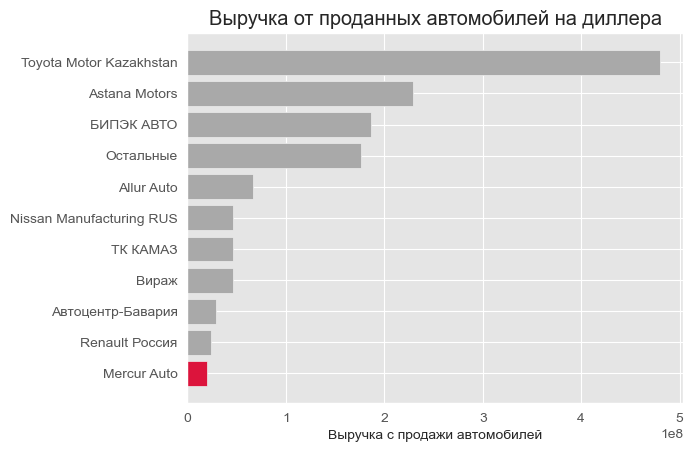

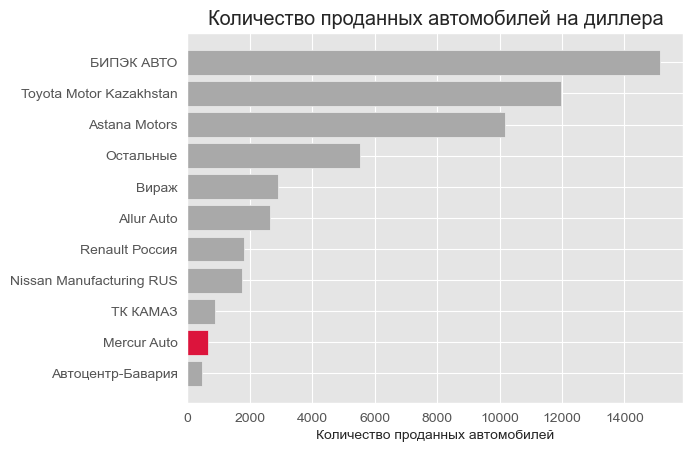

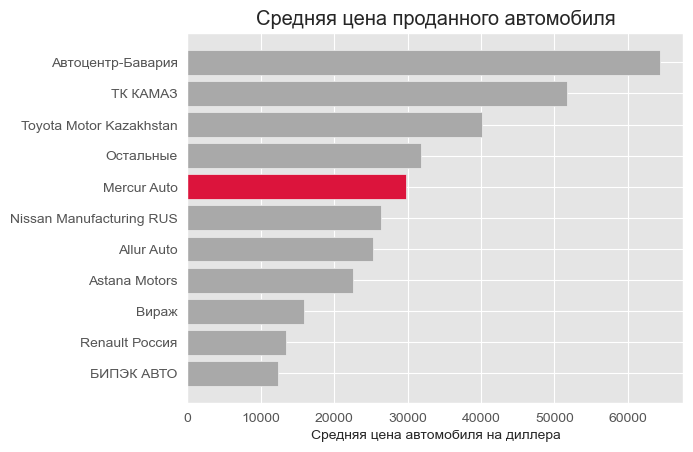

In [134]:

for i in ['amount_of_sales', 'quantity', 'mean_auto_price']:
    company_sales = company_sales.sort_values(by =i).reset_index(drop=True)
    mercur_index = company_sales.query('company == "Mercur Auto"').index
    
    colors = ['darkgray'] * 23
    colors[mercur_index[0]] = 'crimson'
    
    plt.barh(company_sales['company'], company_sales[i], color=colors)
    plt.ylabel("")
    
    if i == 'amount_of_sales':
        plt.xlabel("Выручка с продажи автомобилей")
        plt.title("Выручка от проданных автомобилей на диллера")
    elif i == 'quantity':
        plt.xlabel("Количество проданных автомобилей")
        plt.title("Количество проданных автомобилей на диллера") 
    else:
        plt.xlabel("Средняя цена автомобиля на диллера")
        plt.title("Средняя цена проданного автомобиля")   
    plt.show()

Как мы видим, что Меркур Авто не является однозначным лидером в Казахстане по продаже автомобилей ни в единицах проданных автомобилей, ни в выручке с их продажи.

Посмотрим, какие автомобили продает Меркур Авто

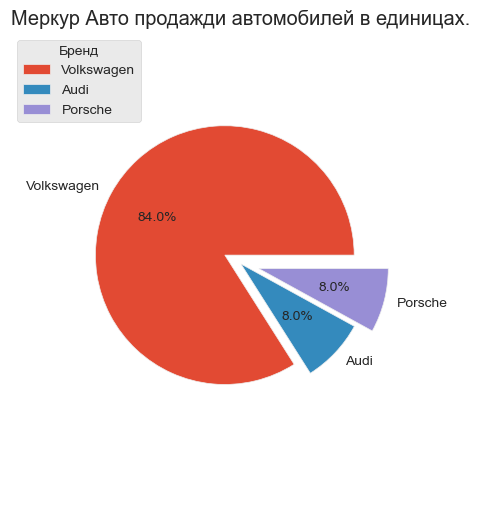

In [135]:
mercur_brands = (data.query('company == "Mercur Auto"')
                .groupby(['brand'])
                .agg({'quantity':'sum'})
                .sort_values(by='quantity',ascending=False))

explode = (0.1, 0.0, 0.1)

fig, ax = plt.subplots(figsize=(7, 6))

plt.pie(mercur_brands['quantity'], 
        labels = mercur_brands.index, 
        autopct='%1.1f%%', 
        radius=0.7, 
        explode=explode);
plt.title('Меркур Авто продажди автомобилей в единицах.')
plt.legend(loc='upper left', title = 'Бренд')
plt.show()

Мы видим, что Меркур Авто продавал автомобили концерна Volkswagen Group.

In [136]:
display(data.query('company == "Mercur Auto"')
        .groupby(['model'])
        .agg({'quantity':'sum'})
        .sort_values(by='quantity',ascending=False)
        .head())

,quantity
model,
Polo,440.0
Tiguan,81.0
Cayenne,28.0
Q8,20.0
Macan,15.0


Лидером продаж в колличественном эквиваленте являлись Volkswagen Polo, что является базовой моделью Volkswagen, на втором месте идет Volkswagen Tiguan, можно сказать, вторая модель в линейке Volkswagen, а дальше мы видим модели премиум класса.

Посмотрим, какие модели приносили больше всего денег.

,sell_price_usd
model,
Polo,6.418764e+06
Cayenne,2.856255e+06
Tiguan,2.642564e+06
Q8,1.793118e+06
Panamera,1.079062e+06


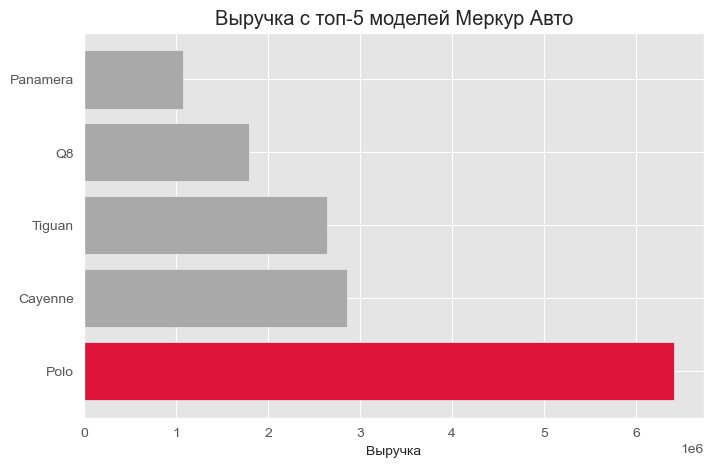

In [137]:
mercur_models = (data.query('company == "Mercur Auto"')
        .groupby(['model'])
        .agg({'sell_price_usd':'sum'})
        .sort_values(by='sell_price_usd',ascending=False)
        .head())

display(mercur_models)

colors = ['darkgray'] * 5
colors[0] = 'crimson'


# график средней цены проданных автомобилей
fig = plt.figure(figsize=(8, 5))
 
plt.barh(mercur_models.index, mercur_models['sell_price_usd'], color=colors)
 
plt.xlabel("Выручка")
plt.ylabel("")
plt.title("Выручка с топ-5 моделей Меркур Авто")
plt.show()

Мы видим, что по выручке с отрывом в 2 раза лидирует Volkswagen Polo, а дальше идут автомобили премиум класса.

Посмотрим, где Меркур Авто продавали автомобили.

,sell_price_usd
region,
Алматы,1.538945e+07
Нур-Султан,1.639059e+06
Костанай,8.033476e+05
Атырау,7.900245e+05
Караганда,4.294489e+05


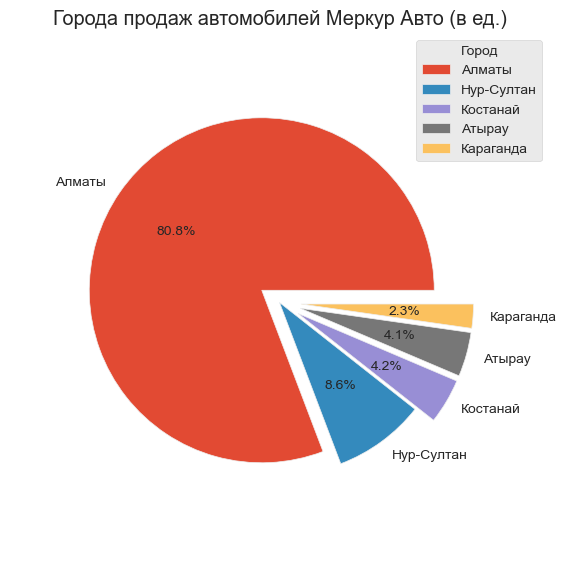

In [138]:
mercur_region_sales = (data.query('company == "Mercur Auto"')
        .groupby(['region'])
        .agg({'sell_price_usd':'sum'})
        .sort_values(by='sell_price_usd',ascending=False)
        .head())

display(mercur_region_sales)


explode = (0.1, 0.0, 0.1, 0.1, 0.1)

fig, ax = plt.subplots(figsize=(10, 7))

plt.pie(mercur_region_sales['sell_price_usd'], 
        labels = mercur_region_sales.index, 
        autopct='%1.1f%%', 
        radius=0.8,  
        explode=explode);
plt.title('Города продаж автомобилей Меркур Авто (в ед.)')
plt.legend(loc='upper right', title = 'Город')
plt.show()


,quantity,sell_price_usd
region,,
Алматы,484.0,1.538945e+07
Нур-Султан,59.0,1.639059e+06
Костанай,26.0,8.033476e+05
Атырау,43.0,7.900245e+05
Караганда,23.0,4.294489e+05


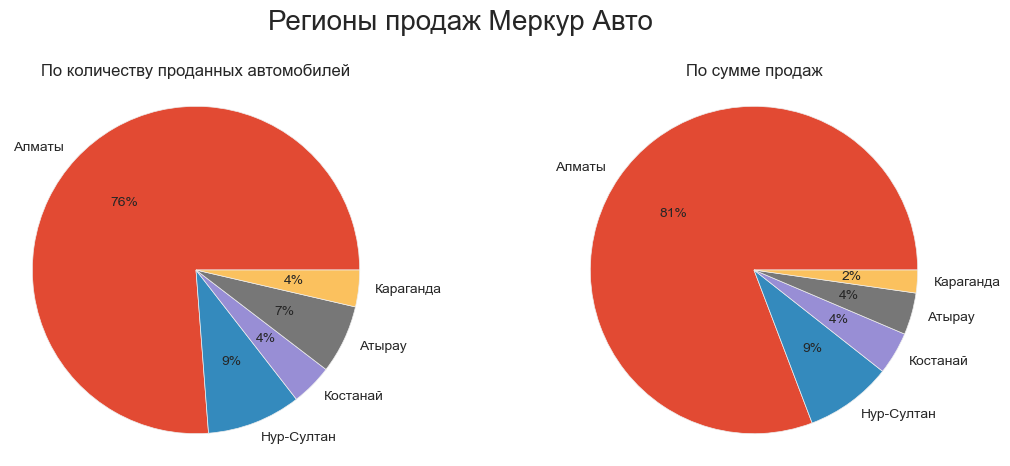

In [139]:
mercur_region_sales = (data.query('company == "Mercur Auto"')
        .groupby(['region'])
        .agg({'quantity':'sum', 'sell_price_usd':'sum'})
        .sort_values(by='sell_price_usd',ascending=False)
        .head())

display(mercur_region_sales)


#задаем размеры общего графика
fig, ax = plt.subplots(1, 2, figsize=(12,8))
fig.subplots_adjust(top=1.2, wspace= 0.5)
fig.suptitle('Регионы продаж Меркур Авто', fontsize=20)
#создаем круговую диаграмму по количеству проданных авто
ax[0].pie(mercur_region_sales['quantity'],
          labels=mercur_region_sales.index,
          radius = 1.1,
          autopct='%.0f%%')
ax[0].set_title('По количеству проданных автомобилей', fontsize=12)


# создаем график распределения сумме продаж
ax[1].pie(mercur_region_sales['sell_price_usd'],
          labels=mercur_region_sales.index,
          radius = 1.1,
          autopct='%.0f%%')
ax[1].set_title('По сумме продаж', fontsize=12)


plt.show()

На первом месте по продажам идет Алматы, это логично, т.к. Алматы является крупнейшим городом Казахстана.

Посмотрим, есть ли еще автодилеры, которые продают те же бренды в тех же регионах, это и будут наши прямые конкуренты.

In [140]:
display(data.query('company == "Mercur Auto"')
        .groupby(['manufacturing_country'])
        .agg({'quantity':'sum', 'sell_price_usd':'sum'})
        .sort_values(by='sell_price_usd',ascending=False)
        .head())

,quantity,sell_price_usd
manufacturing_country,,
Германия,119.0,9.781646e+06
Российская Федерация,530.0,9.521526e+06
США,1.0,5.210336e+04


In [141]:
print('Автодилеры с брендами, как у Меркур Авто и в тех же регионах :', 
      data.query('brand in @mercur_brands.index & region in @mercur_region_sales.index')['company'].unique())

Автодилеры с брендами, как у Меркур Авто и в тех же регионах : ['Mercur Auto' 'Volkswagen Group Rus' 'Автодом Motors KST' 'Автомир-Центр']


Мы видим, что кроме Меркьют Авто есть еще 3 компании. 
Отфильтруем датафрейм по брендам, городам для удобства работы.

In [142]:
competitors = data.query('brand in @mercur_brands.index & region in @mercur_region_sales.index')

Сравним автодилеров по продажам автомобилей в шт.

,quantity,sell_price_usd
company,,
Mercur Auto,635.0,1.905133e+07
Volkswagen Group Rus,614.0,1.266427e+07
Автодом Motors KST,53.0,1.064732e+06
Автомир-Центр,34.0,6.605529e+05


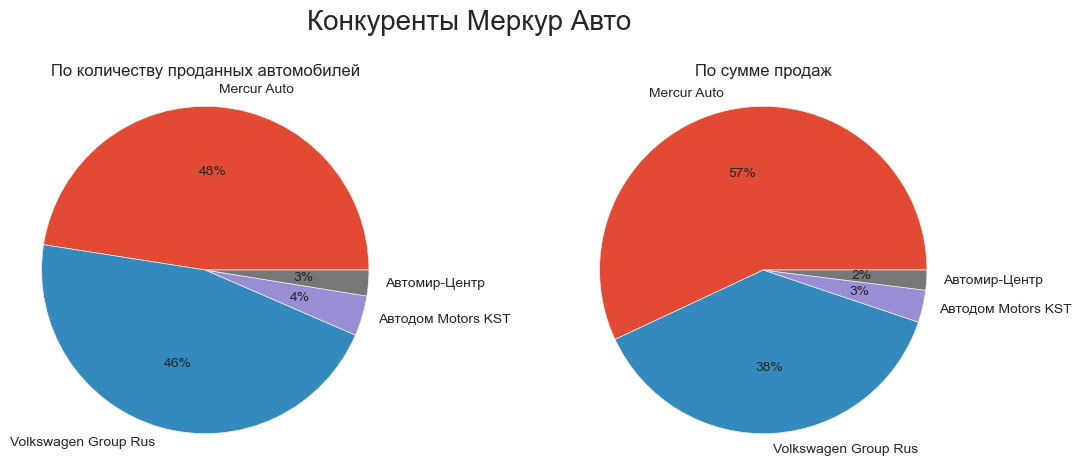

In [143]:
competitors_sales = (competitors
                                .groupby(['company'])
                                .agg({'quantity':'sum', 'sell_price_usd':'sum'})
                                .sort_values(by='sell_price_usd',ascending=False)
                                .head())

display(competitors_sales)


#задаем размеры общего графика
fig, ax = plt.subplots(1, 2, figsize=(12,8))
fig.subplots_adjust(top=1.2, wspace= 0.5)
fig.suptitle('Конкуренты Меркур Авто', fontsize=20)
#создаем круговую диаграмму по количеству проданных авто
ax[0].pie(competitors_sales['quantity'],
          labels=competitors_sales.index,
          radius = 1.1,
          autopct='%.0f%%')
ax[0].set_title('По количеству проданных автомобилей', fontsize=12)


# создаем график распределения сумме продаж
ax[1].pie(competitors_sales['sell_price_usd'],
          labels=competitors_sales.index,
          radius = 1.1,
          autopct='%.0f%%')
ax[1].set_title('По сумме продаж', fontsize=12)


plt.show()

По продажам Меркур Авто является лидером, но немного отстает Volkswagen Group Rus, видимо, официальный дистрибутор Volkswagen Group.

company,sell_date,Mercur Auto,Volkswagen Group Rus,Автодом Motors KST,Автомир-Центр
0,2019-01-01,165,0,18,6
1,2019-02-01,117,0,16,0
2,2019-03-01,73,0,0,0
3,2019-04-01,77,7,19,14
4,2019-05-01,153,45,0,14
5,2019-06-01,9,155,0,0
6,2019-07-01,17,84,0,0
7,2019-08-01,14,166,0,0
8,2019-09-01,10,157,0,0


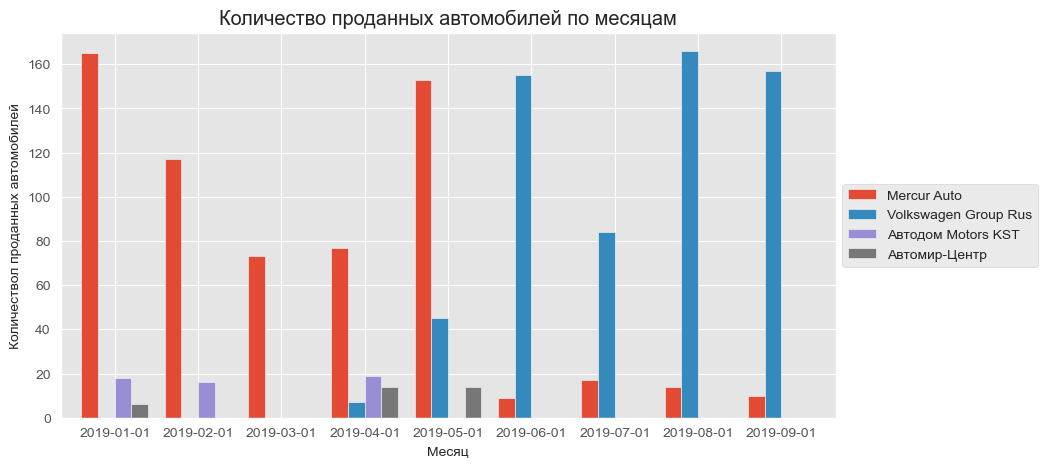

In [144]:
competitors_date_sales = (pd.pivot_table(competitors, 
                                         values='quantity', 
                                         index='sell_date', 
                                         columns=['company'], 
                                         aggfunc="sum", 
                                         fill_value=0)
                          .reset_index()
                          .sort_values(by='sell_date'))
display(competitors_date_sales)

competitors_date_sales.plot(x='sell_date', y=['Mercur Auto',
                                              'Volkswagen Group Rus', 
                                              'Автодом Motors KST', 
                                              'Автомир-Центр'],
         kind="bar", 
         figsize=(10,5),
         width=0.8,
         rot=0,
         title = 'Количество проданных автомобилей по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количествол проданных автомобилей')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Мы видим, что с апреля 2019 года появились продажи у Volkswagen Group Rus, а спустя 2 месяца продажи автомобилей упали у всех, в то время, как у Volkswagen Group Rus наблюдается большой рост.  
Согласно [новостям](https://www.vedomosti.ru/auto/articles/2018/07/30/776821-vw-kazahstana) Volkswagen Group Rus летом 2018 года официально пришел на рынок Казахстана, и, скорее всего, Меркьюр авто потерял часть привелегий. А покупателям, возможно, стало проще обращатсья и покупать автомобили у орфициального представителя компании с названием, совпадающим с торговой маркой.

company,sell_date,Mercur Auto,Volkswagen Group Rus,Автодом Motors KST,Автомир-Центр
0,2019-01-01,2.979407e+06,0.000000e+00,340960.46297,108951.50454
1,2019-02-01,2.765143e+06,0.000000e+00,319911.15732,0.00000
2,2019-03-01,2.603802e+06,0.000000e+00,0.00000,0.00000
3,2019-04-01,2.651402e+06,2.868946e+05,403860.39147,311923.83026
4,2019-05-01,3.687779e+06,1.160826e+06,0.00000,239677.56694
5,2019-06-01,8.357510e+05,3.078197e+06,0.00000,0.00000
6,2019-07-01,1.386826e+06,1.901829e+06,0.00000,0.00000
7,2019-08-01,1.110374e+06,3.291450e+06,0.00000,0.00000
8,2019-09-01,1.030846e+06,2.945076e+06,0.00000,0.00000


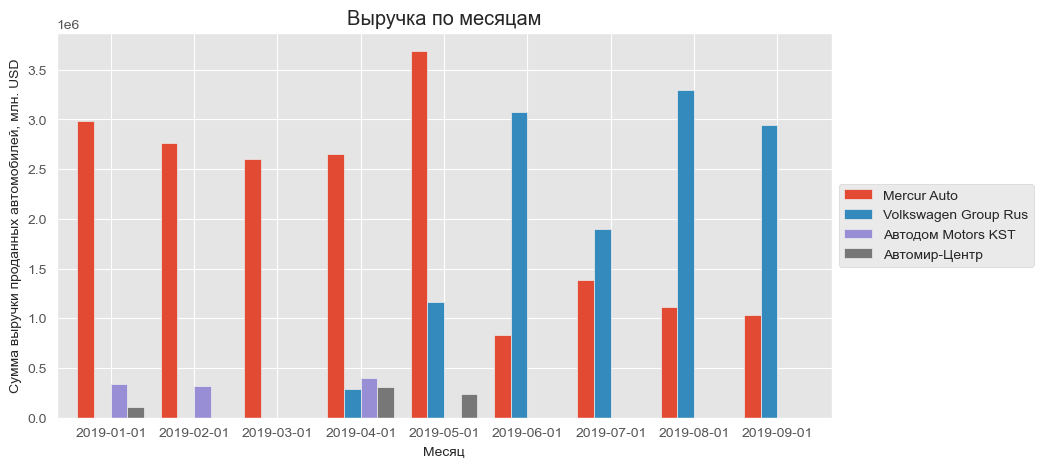

In [145]:
competitors_date_sales_sum = (pd.pivot_table(competitors, 
                                         values='sell_price_usd', 
                                         index='sell_date', 
                                         columns=['company'], 
                                         aggfunc="sum", 
                                         fill_value=0)
                          .reset_index()
                          .sort_values(by='sell_date'))
display(competitors_date_sales_sum)

competitors_date_sales_sum.plot(x='sell_date', y=['Mercur Auto',
                                                  'Volkswagen Group Rus', 
                                                  'Автодом Motors KST', 
                                                  'Автомир-Центр'],
         kind="bar", 
         figsize=(10,5), 
         width=0.8,
         rot=0,
         title = 'Выручка по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Сумма выручки проданных автомобилей, млн. USD')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

В денежном выражении картина выглядит точно также, с апреля поялвяются продажи у Volkswagen Group Rus, а с июля у Меркур Авто резкое падение продаж.

Посмотрим, может быть Меркур авто перестроились и с приходом Volkswagen Group Rus стали работать с юридическими лицами больше.

client_type,sell_date,ФЛ,ЮЛ
0,2019-01-01,2.849471e+06,1.299352e+05
1,2019-02-01,2.765143e+06,0.000000e+00
2,2019-03-01,2.312900e+06,2.909027e+05
3,2019-04-01,2.024286e+06,6.271160e+05
4,2019-05-01,2.229534e+06,1.458245e+06
5,2019-06-01,7.712770e+05,6.447400e+04
6,2019-07-01,9.207570e+05,4.660690e+05
7,2019-08-01,1.078127e+06,3.224699e+04
8,2019-09-01,7.852460e+05,2.456000e+05


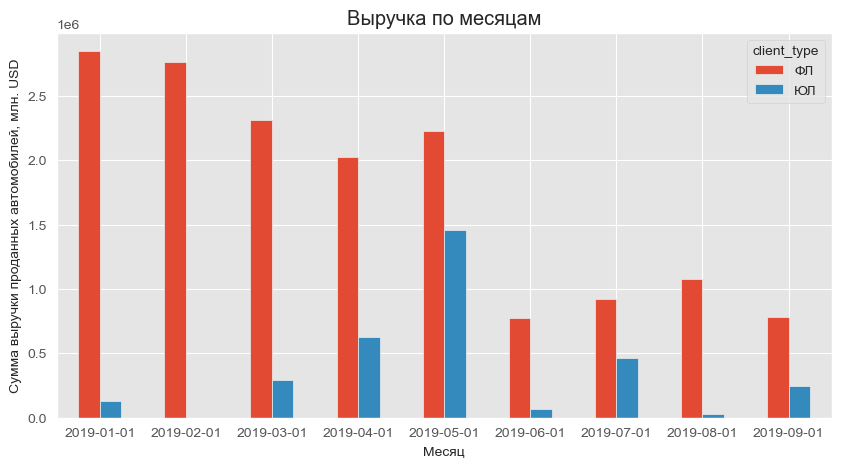

In [146]:
mercur_sales_fl = (pd.pivot_table(competitors.query('company == "Mercur Auto"'), 
                                         values='sell_price_usd', 
                                         index='sell_date', 
                                         columns=['client_type'], 
                                         aggfunc="sum", 
                                         fill_value=0)
                          .reset_index()
                          .sort_values(by='sell_date'))

display(mercur_sales_fl)

mercur_sales_fl.plot(x='sell_date', y=['ФЛ','ЮЛ'],
         kind="bar", 
         figsize=(10,5), 
         rot=0,
         title = 'Выручка по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Сумма выручки проданных автомобилей, млн. USD')
plt.show()

К маю месяцу Меркур Авто, видимо, еще выполняла контракт по поставке автомобилей юридическому лицу, но после этого нет ощутимого роста продаж юридическим лицам, или наоборот физическим.

**Вывод** 
- Меркур Авто входит в топ 11 дилеров по продажам автомобилей Казахстана,
- Продавали автомобили концерна Volkswagen Group.
- Лидером продаж в колличественном эквиваленте являлись Volkswagen Polo, что является базовой моделью Volkswagen, на втором месте идет Volkswagen Tiguan, можно сказать, вторая модель в линейке Volkswagen, а дальше мы видим модели премиум класса.
- По выручке с отрывом в 2 раза лидирует Volkswagen Polo, а дальше идут автомобили премиум класса.
- На первом месте по продажам идет Алматы, это логично, т.к. Алматы является крупнейшим городом Казахстана.
- У Меркур Авто есть 3 прямых конкурента: Volkswagen Group Rus, Автодом Motors KST, Автомир-Центр.
- По общим цифрам за год по продажам Меркур Авто является лидером, но немного отстает Volkswagen Group Rus, видимо, официальный дистрибутор Volkswagen Group.
- С апреля 2019 года появились продажи у Volkswagen Group Rus, а спустя 2 месяца продажи автомобилей упали у всех, в то время, как у Volkswagen Group Rus наблюдается большой рост. Согласно [новостям](https://www.vedomosti.ru/auto/articles/2018/07/30/776821-vw-kazahstana) Volkswagen Group Rus летом 2018 года официально пришел на рынок Казахстана, и, скорее всего, Меркьюр авто потерял часть привелегий. А покупателям, возможно, стало проще обращатсья и покупать автомобили у орфициального представителя компании с названием, совпадающим с торговой маркой.
- Судя по всему, Меркур Авто не успели перестроиться с приходом крупного игрока - прямого конкурента.

Скорее всего, если Меркур Авто не предпримет какие-то меры, например, не найдет крупного покупателя среди юридических лиц, он потеряет в продажах еще сильнее Volkswagen Group Rus.

## Вывод

Мы подготовили данные к анализу:

- переименовали столбцы и привели их к “змеиному регистру”,
- убрали не требующиеся для анализа столбцы,
- проверили на пропуски датафрейм, численные пропуски заполнили значением 999, а строчные - ‘nodata’,
- проверили на явные дубли и удалили неявные,
- добавили столбец с датой продажи в формате datetime.

Проанализировали данные:

- больше всего сделок было по автомобилем со средним объемом двигателя, потом с малым, меньше всего по авто с высшим объемом двигателя;
- средняя цена автомобиля - 28250 USD, медианная 24282 USD, минимальная - 7100 USD, максимальная - 328510 USD за автобус Mercedes-Benz Trucks, 75% сделовк было с автомобилями ценой до 32 5050 USD, самые дорогие автомобили - элитные и коммерческий транспорт, самые дешевые - легковые автомобили из СНГ и Китая;
- 75% сделок происходят с одним автомобилем, что логично, т.к. обычно один покупатель покупает себе один автомобиль, больше всего за одну сделку было продано 115 автомобилей;
- средняя сумма сделки - 33764 USD, медианная. - 26249 USD, 75% сделок было сделано на сумму до 35 000 USD, минимальная сумма сделки - 7100 USD, максимальная 3 778 206 USD, сумма сделки равна произведению цены автомобиля на количество.

Провели анализ рынка автомобилей Казахстана:

- С большим отрывом видна тройка лидеров производителей: 1 место - Lada (11092 автомобилей? 20,5% рынка), 2 - Toyota (10745 автомобилей, 20% рынка), 3- Hyundai (10168 автомобилей, 19% рынка). Nefaz является самой непопулярной маркой машины, в 2019 году был продан только 1 автобус.
- Самой популярной моделью автомобиля является Toyota Camry (4853 автомобилей, 9% рынка), на втором месте - Lada Granta (3664 автомобилей, 6,8% рынка), на третьем - Hyundai Tucson (3271 автомобилей, 6,1% рынка).
- Более половины автомобилей, проданных в 2019 году были собраны в Казахстане (31367 автомобилей, 58% рынка), на втором месте - Россия (14341 автомобилей, 27% рынка), на третьем месте - Япония (4612 автомобилей, 9% рынка).
- 89% проданных в 2019 году автомобилей были на бензине, по 6,5% у нас нет данных, а на дизеле 4,1%. Доля гибридных и электроавтомобилей менее 1%.
- 44,5% рынка автомобилей были с малы объемом двигателя (от 1,1 до 1,8 л), 42,5 % со средним (от 1,8 до 3,5 л).
- 41,4% проданных автомобилей были с передним приводом, 35% - с полным приводом.
- 44,2% проданных автомобилей были легковыми, 40,8% - внедорожниками.
- Физические лица больше покупают автомобили, как в количественном, так и в денежном эквиваленте - 46% по количеству автомобилей, 52% по сумме продаж, юрилические лица - 42% по количеству автомобилей и 37% по сумме продаж, по 12% у нас нет данных.

Провели анализ позиции Меркур Авто:

- Меркур Авто входит в топ 11 дилеров по продажам автомобилей Казахстана,
- Продавали автомобили концерна Volkswagen Group.
- Лидером продаж в колличественном эквиваленте являлись Volkswagen Polo, что является базовой моделью Volkswagen, на втором месте идет Volkswagen Tiguan, можно сказать, вторая модель в линейке Volkswagen, а дальше мы видим модели премиум класса.
- По выручке с отрывом в 2 раза лидирует Volkswagen Polo, а дальше идут автомобили премиум класса.
- На первом месте по продажам идет Алматы, это логично, т.к. Алматы является крупнейшим городом Казахстана.
- У Меркур Авто есть 3 прямых конкурента: Volkswagen Group Rus, Автодом Motors KST, Автомир-Центр.
- По общим цифрам за год по продажам Меркур Авто является лидером, но немного отстает Volkswagen Group Rus, видимо, официальный дистрибутор Volkswagen Group.
- С апреля 2019 года появились продажи у Volkswagen Group Rus, а спустя 2 месяца продажи автомобилей упали у всех, в то время, как у Volkswagen Group Rus наблюдается большой рост. Согласно [новостям](https://www.vedomosti.ru/auto/articles/2018/07/30/776821-vw-kazahstana) Volkswagen Group Rus летом 2018 года официально пришел на рынок Казахстана, и, скорее всего, Меркьюр авто потерял часть привелегий. А покупателям, возможно, стало проще обращатсья и покупать автомобили у орфициального представителя компании с названием, совпадающим с торговой маркой.
- Судя по всему, Меркур Авто не успели перестроиться с приходом крупного игрока - прямого конкурента.

Скорее всего, если Меркур Авто не предпримет какие-то меры, например, не найдет крупного покупателя среди юридических лиц, он потеряет в продажах еще сильнее Volkswagen Group Rus.